### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- After completing each Assignment Activity, back up your work to a safe location. This would allow you to revert to a previous state in the case of making a mistake in the code, or deleting a section by mistake. (A simple way of doing this is to save or mail a compressed version at frequent intervals).

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Plan your approach

The project below aims to provide answers to the NHS' business problems which will potentially save costs and help to reduce appoitments being missed by patients. Therefore, it will aim to increase the NHS' over all effeciency. 

The two main questions which the project will cover are: 
1) Has there been enough staff and capacity in the NHS.
2) How have the NHS' recources been utilised?

These questions will be answered throughout the report using visual tools such as  line graphs, box plots and bar charts. 

# 

# Assignment activity 2

### Prepare your workstation

In [43]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv("actual_duration.csv") 
# View the DataFrame.
print(ad.shape)
ad.head()

(137793, 8)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [47]:
# Determine whether there are missing values.
missing_values = ad.isnull().sum() 

print("Missing values in the actual_duration DataFrame:")
print(missing_values[missing_values > 0])

Missing values in the actual_duration DataFrame:
Series([], dtype: int64)


In [49]:
# Determine the metadata of the data set.
print("Metadata of the actual_duration DataFrame:")
print(ad.info())

Metadata of the actual_duration DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [51]:
# Determine the descriptive statistics of the data set.
print(ad.describe())

       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000


In [53]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv("appointments_regional.csv")


# View the DataFrame.
print(ar.shape)
ar.head()


(596821, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [55]:
# Determine whether there are missing values.

ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [57]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [59]:
# Determine the descriptive statistics of the data set.
print(ar.describe())

       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000


In [ ]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel("national_categories.xlsx")

# View the DataFrame.
print(nc.shape)
nc.head()

In [33]:
# Determine whether there are missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [35]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [37]:
# Determine the descriptive statistics of the data set.
print(nc.describe())

                    appointment_date  count_of_appointments
count                         817394          817394.000000
mean   2022-01-16 00:50:35.860796160             362.183684
min              2021-08-01 00:00:00               1.000000
25%              2021-10-25 00:00:00               7.000000
50%              2022-01-18 00:00:00              25.000000
75%              2022-04-07 00:00:00             128.000000
max              2022-06-30 00:00:00           16590.000000
std                              NaN            1084.576600


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [43]:
# Determine the number of locations.
print("Number of locations:", len(ad['sub_icb_location_name'].unique()))

Number of locations: 106


**Question 2:** What are the five locations with the highest number of appointments?



In [57]:
# Determine the top five locations based on record count.
nc_locations_top5 = nc['sub_icb_location_name'].value_counts().head(5)
nc_locations_top5

sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: count, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [61]:
# Determine the number of service settings.
print(nc['service_setting'].value_counts())
service_settings = len(pd.unique(nc['service_setting']))
print("Count of service settings: ", service_settings)

service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64
Count of service settings:  5


In [69]:
# Determine the number of context types.
nc_cc = len(pd.unique(nc['context_type']))
print("Count of context types: ", nc_cc)

Count of context types:  3


In [71]:
# Determine the number of national categories.
nc_cc = len(pd.unique(nc['context_type']))
print("Count of context types: ", nc_cc)

Count of context types:  3


In [73]:
# Determine the number of appointment statuses.
ar_as = len(pd.unique(ar['appointment_status']))
print("Count of appointment statuses: ", ar_as)

Count of appointment statuses:  3


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [7]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [14]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [15]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])


# View the DateFrame.
ad

# View the head 
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [23]:
# Change the date format of ar['appointment_date'].
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the DateFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [536]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad['appointment_date'].agg(['min', 'max'])
print(min(ad['appointment_date']), 'as minumum')
print(max(ad['appointment_date']), 'as maximum')


01-Apr-22 as minumum
31-May-22 as maximum


In [538]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
nc['appointment_date'].agg(['min', 'max'])

min   2021-08-01
max   2022-06-30
Name: appointment_date, dtype: datetime64[ns]

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [560]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Location
service1 = nc.loc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')]
# View the output.
service1

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
794321,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,607,2021-08
794322,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,6,2021-08
794323,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,47,2021-08
794324,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Walk-in,74,2021-08
794325,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Planned Clinics,98,2021-08
...,...,...,...,...,...,...,...,...
807323,2022-06-30,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,6,2022-06
807324,2022-06-30,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,25,2022-06
807325,2022-06-30,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,217,2022-06
807326,2022-06-30,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Clinical Triage,103,2022-06


In [558]:
# Time Frame 
service2 = service1[(service1['appointment_date'] >= '2022-01-01') & (df2['appointment_date'] <= '2022-06-01')]

# View the Output 
service2

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01
...,...,...,...,...,...,...,...,...
806220,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Home Visit,4,2022-06
806221,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,27,2022-06
806222,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Unplanned Clinical Activity,626,2022-06
806223,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,224,2022-06


**Question 3:** Which month had the highest number of appointments?

In [568]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc_group = nc.groupby('appointment_month')[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)
nc_group.head()

,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2022-05,27495508


**Question 4:** What was the total number of records per month?

In [572]:
# Total number of records per month.
# Extract the month from the appointment_date
nc['appointment_month'] = nc['appointment_date'].dt.to_period('M')

# Group by the month and count the records
total_records_per_month = nc.groupby('appointment_month').size().reset_index(name='total_records')

# View the resulting DataFrame
print(total_records_per_month)


   appointment_month  total_records
0            2021-08          69999
1            2021-09          74922
2            2021-10          74078
3            2021-11          77652
4            2021-12          72651
5            2022-01          71896
6            2022-02          71769
7            2022-03          82822
8            2022-04          70012
9            2022-05          77425
10           2022-06          74168


# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [67]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [68]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)



In [69]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss.head()


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


**Service settings:**

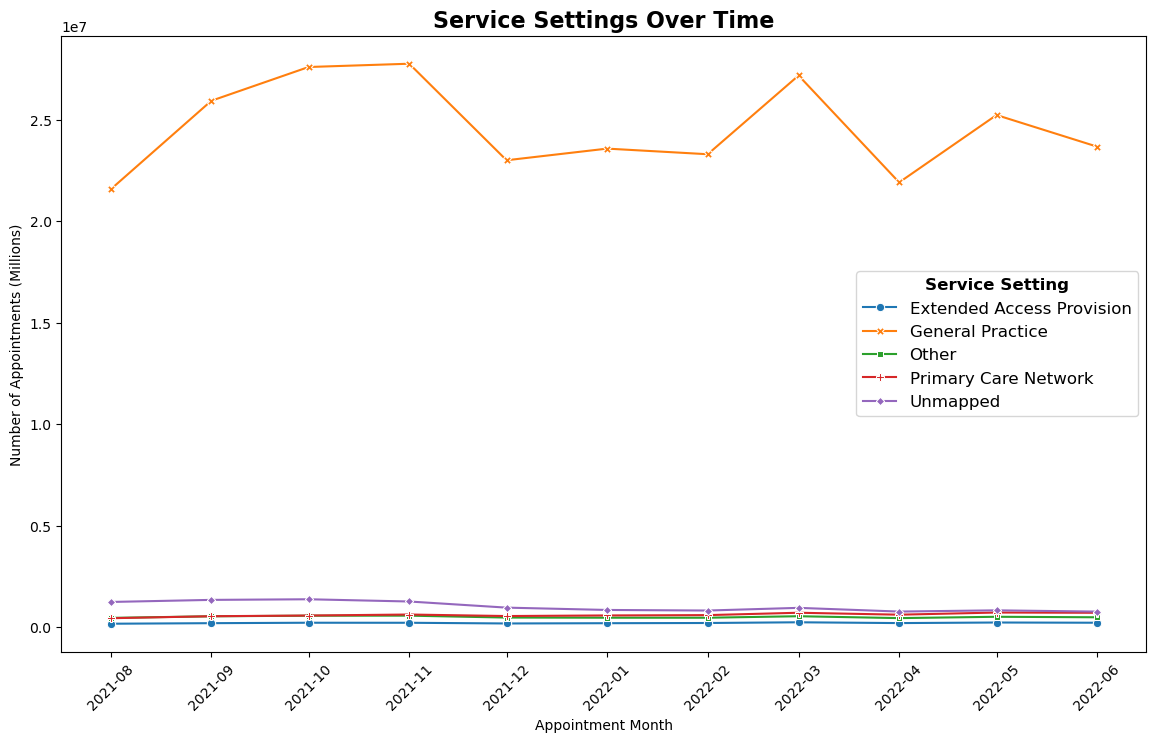

In [26]:

# Plot the appointments over the available date range, and review the service settings each month.
# Create a lineplot.

# Ensure 'appointment_month' is datetime
nc_ss['appointment_month'] = pd.to_datetime(nc_ss['appointment_month'])

# Increase the size of the plot
plt.figure(figsize=(14, 8))

# Plot the appointments over the available date range, and review the service settings each month.
# Create a lineplot with markers.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', 
             data=nc_ss, ci=None, markers=True, style='service_setting', dashes=False)

# Set the title with increased size and bold font
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Settings Over Time", fontdict=title_font)

# Set the titles
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointments (Millions)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set the legend title and place it center right of image
legend_font = {'size': 12}
legend = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1, 0.5), prop=legend_font)

# Bold the legend title
legend.get_title().set_fontweight('bold')

# Function to format the y-axis tick labels (move decimal point one place to the right)
def format_y_tick_label(value, _):
    return f"{value / 1000000:.0f}"  # Move the decimal point one place to the right


# Save the plot to a file (e.g., PNG)
plt.savefig('service_setting_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



**Context types:**

In [ ]:
add in another command 

In [28]:
# Separate data set that can be used in future weeks. 
nc_ft = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()


# View output.
nc_ft.head()

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


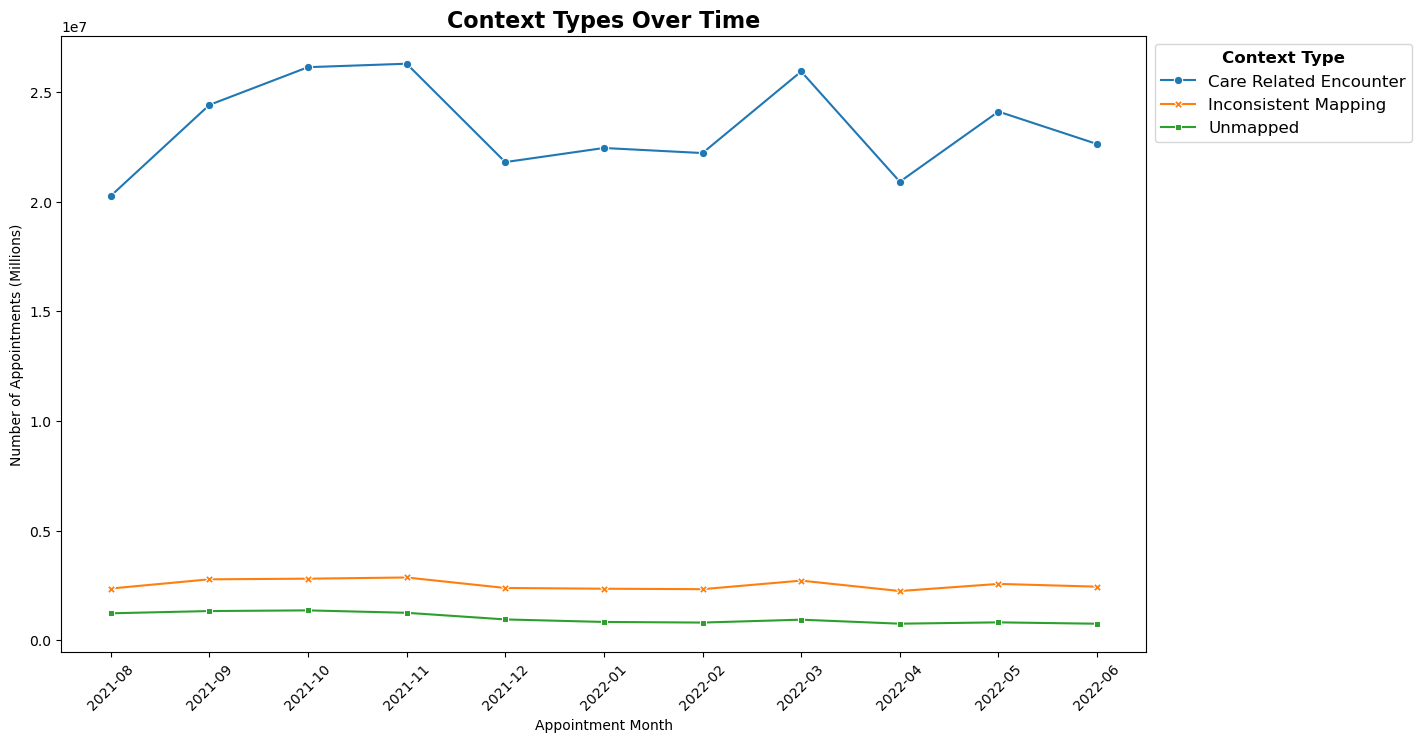

In [46]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.

nc_ct = pd.DataFrame(data)

# Ensure 'appointment_month' is datetime
nc_ct['appointment_month'] = pd.to_datetime(nc_ct['appointment_month'])

# Increase the size of the plot
plt.figure(figsize=(14, 8))

# Create a lineplot with markers
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', 
             data=nc_ft, ci=None, style='context_type', markers=True, dashes=False)

# Set the title with increased size and bold font
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Context Types Over Time", fontdict=title_font)

# Set the titles
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointments (Millions)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend = plt.legend(title='Context Type', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), prop=legend_font)

# Bold the legend title
legend.get_title().set_fontweight('bold')

# Function to format the y-axis tick labels (move decimal point one place to the right)
def format_y_tick_label(value, _):
    return f"{value / 1000000:.0f}"  # Move the decimal point one place to the right

# Save the plot to a file (e.g., PNG)
plt.savefig('context_types_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**National categories:**

In [48]:
# Create a separate data set that can be used in future weeks. 
nc_fw = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# View output.
nc_fw.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


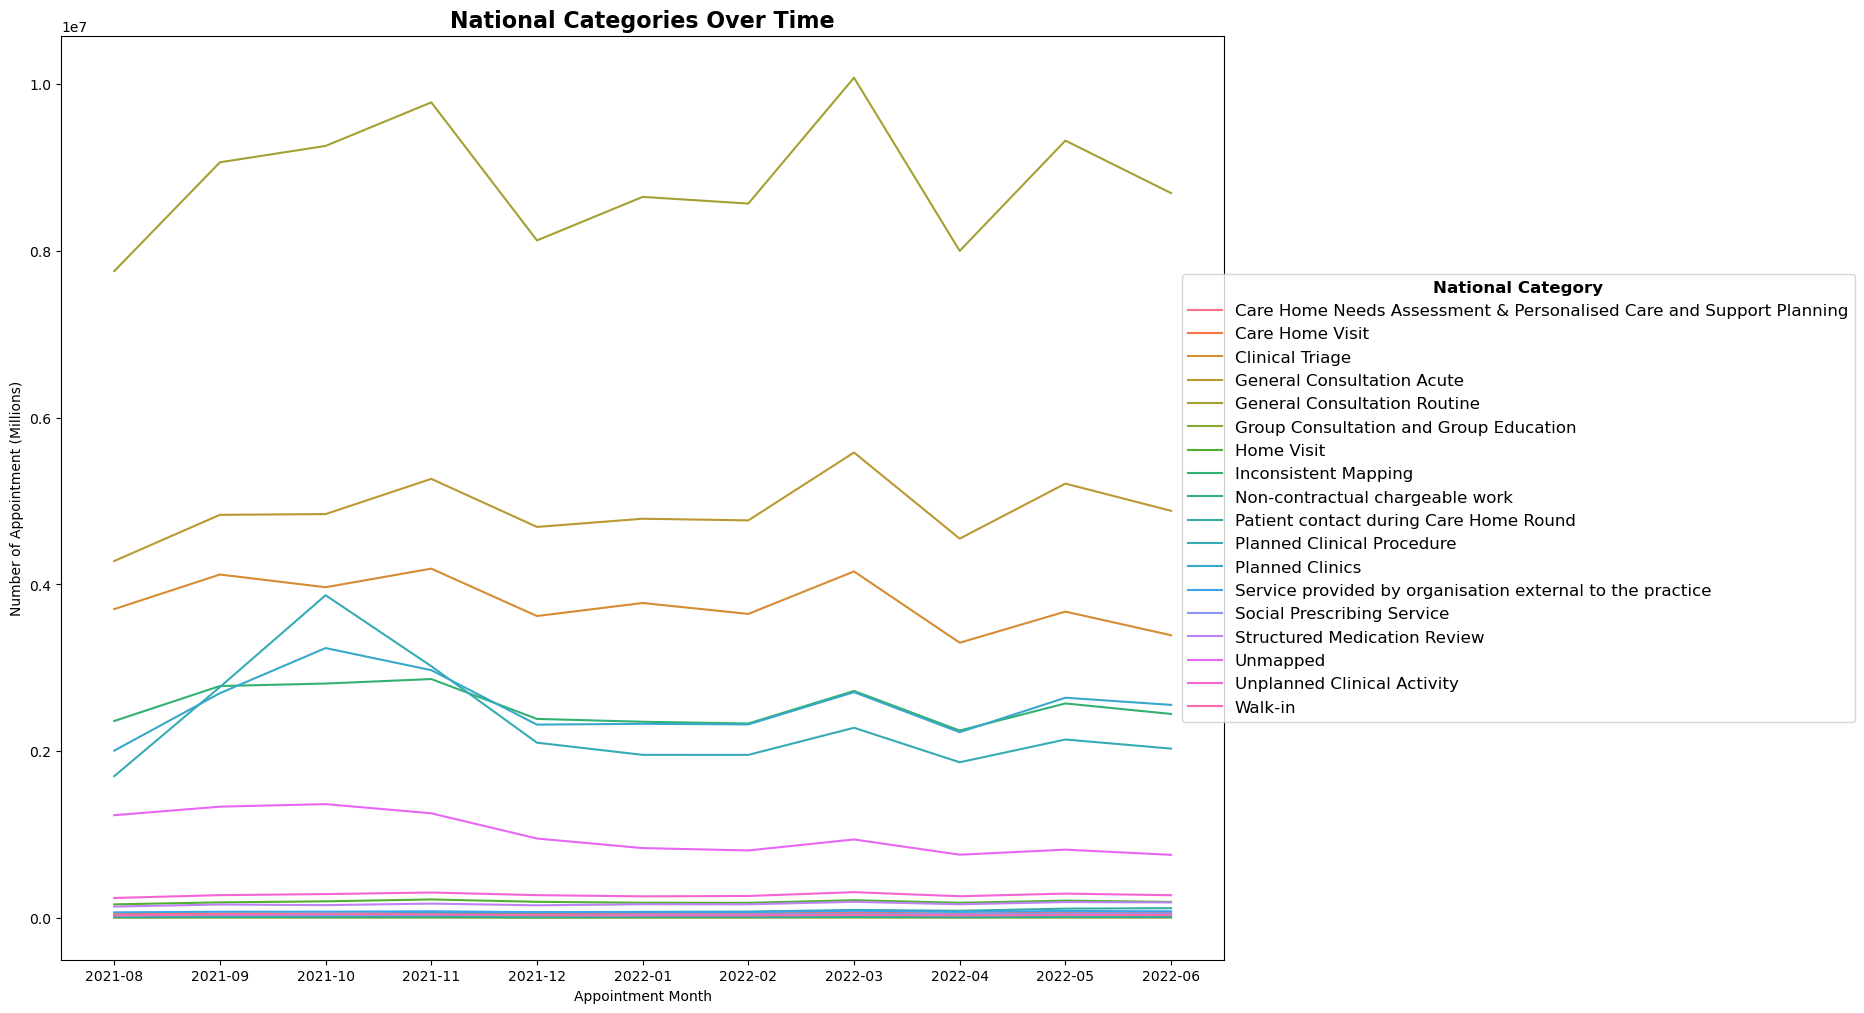

In [56]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
plt.figure(figsize=(15, 12))

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', 
             data=nc_fw, ci=None)

# Set the title with increased size and bold font
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("National Categories Over Time", fontdict=title_font)

# Set the titles
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointment (Millions)")

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend = plt.legend(title='National Category', title_fontsize=12, loc='center right', bbox_to_anchor=(1.55, 0.5), prop=legend_font)

# Bold the legend title
legend.get_title().set_fontweight('bold')

# Function to format the y-axis tick labels (move decimal point one place to the right)
def format_y_tick_label(value, _):
    return f"{value / 1000000:.0f}"  # Move the decimal point one place to the right

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (June to August 2021):**

In [73]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss_day.head()

,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054


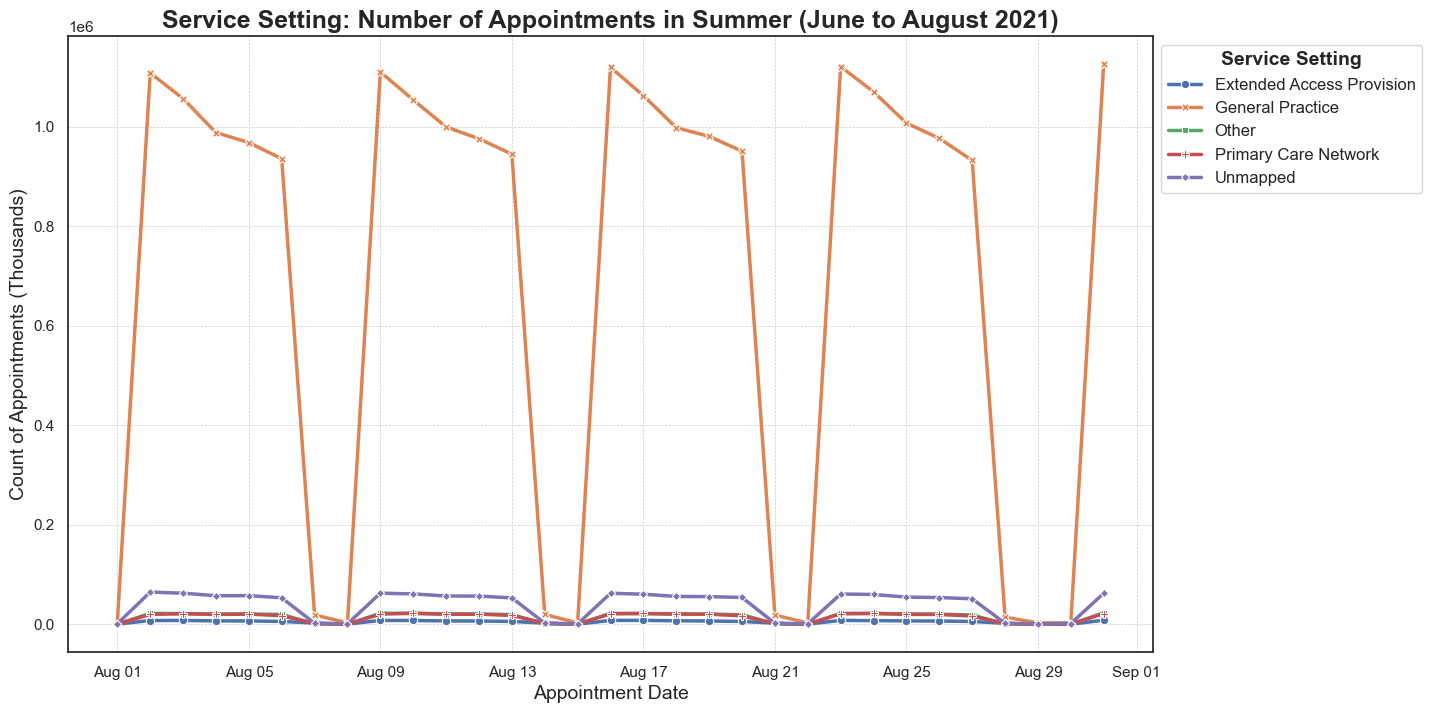

In [75]:
# Look at June to August 2021 in more detail to allow a closer look.
# Create a lineplot.
# Ensure 'appointment_date' is datetime
nc_ss_day['appointment_date'] = pd.to_datetime(nc_ss_day['appointment_date'])

# Filter the data for June to August 2021
nc_ss_day_summer21 = nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-06-01') & (nc_ss_day['appointment_date'] <= '2021-08-31')]

# Enlarge the plot
plt.figure(figsize=(14, 8))

# Create Lineplot with markers and style adjustments
sns.lineplot(data=nc_ss_day_summer21, x='appointment_date', y='count_of_appointments', hue='service_setting', style='service_setting', markers=True, dashes=False, linewidth=2.5)

# Set the title with increased size and bold font
title_font = {'fontsize': 18, 'fontweight': 'bold'}
plt.title("Service Setting: Number of Appointments in Summer (June to August 2021)", fontdict=title_font)

# Set the x and y-axis labels
plt.xlabel("Appointment Date", fontsize=14)
plt.ylabel("Count of Appointments (Thousands)", fontsize=14)

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend_nc_ss_day = plt.legend(title='Service Setting', title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1), prop=legend_font)

# Bold the legend title
legend_nc_ss_day.get_title().set_fontweight('bold')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve the x-axis date formatting
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d'))

# Save the plot to a file (e.g., PNG)
plt.savefig('Service_setting_Summer_June_to_August.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


**Autumn (September to November 2021):**

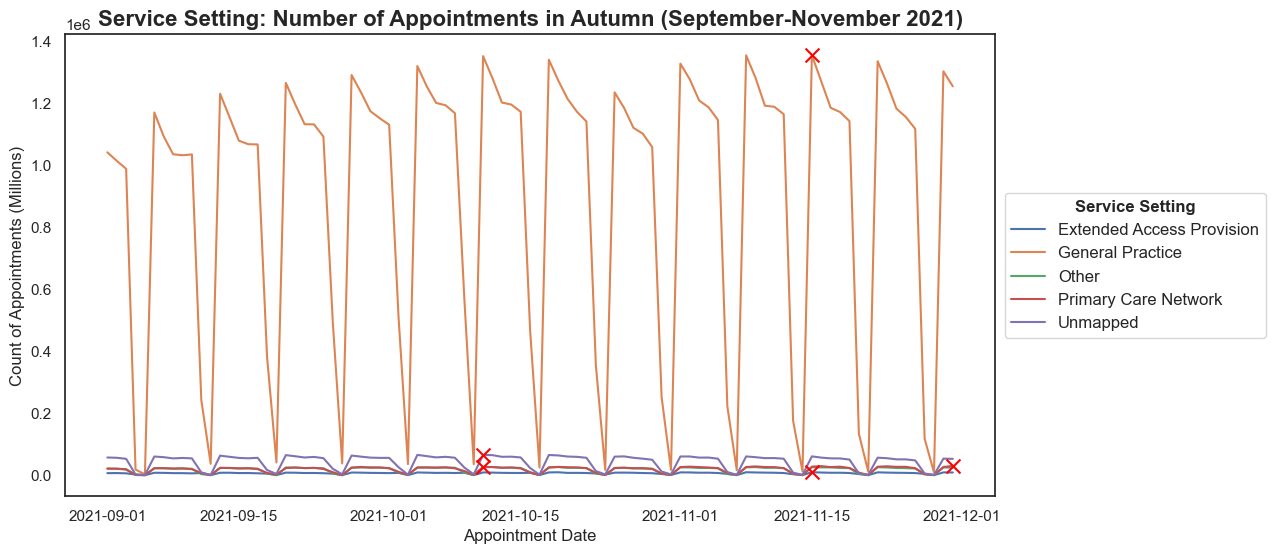

In [91]:
# Look at September to November 2021 in more detail to allow a closer look.
# Create a lineplot.
# Filter the data for August 2021
# Filter the data for August 2021

# Filter the data for the period from September 2021 to November 2021
nc_ss_day_sept_nov21 = nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-09-01') & (nc_ss_day['appointment_date'] <= '2021-11-30')]

# Create Lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=nc_ss_day_sept_nov21, x='appointment_date', y='count_of_appointments', hue='service_setting')

# Title and Axis Labels
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Setting: Number of Appointments in Autumn (September-November 2021)", fontdict=title_font)

plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments (Millions)")

# Adding month labels at the bottom
months = nc_ss_day_sept_nov21['appointment_date'].dt.strftime('%Y-%m').unique()


# Finding and marking the peaks
peaks = nc_ss_day_sept_nov21.loc[nc_ss_day_sept_nov21.groupby('service_setting')['count_of_appointments'].idxmax()]
plt.scatter(peaks['appointment_date'], peaks['count_of_appointments'], color='red', marker='x', s=100, zorder=5)

# Legend Settings
legend_font = {'size': 12}
legend_nc_ss_day = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1.30, 0.5), prop=legend_font)
legend_nc_ss_day.get_title().set_fontweight('bold')

# Display the plot
plt.show()

**Winter (December to February 2022):**

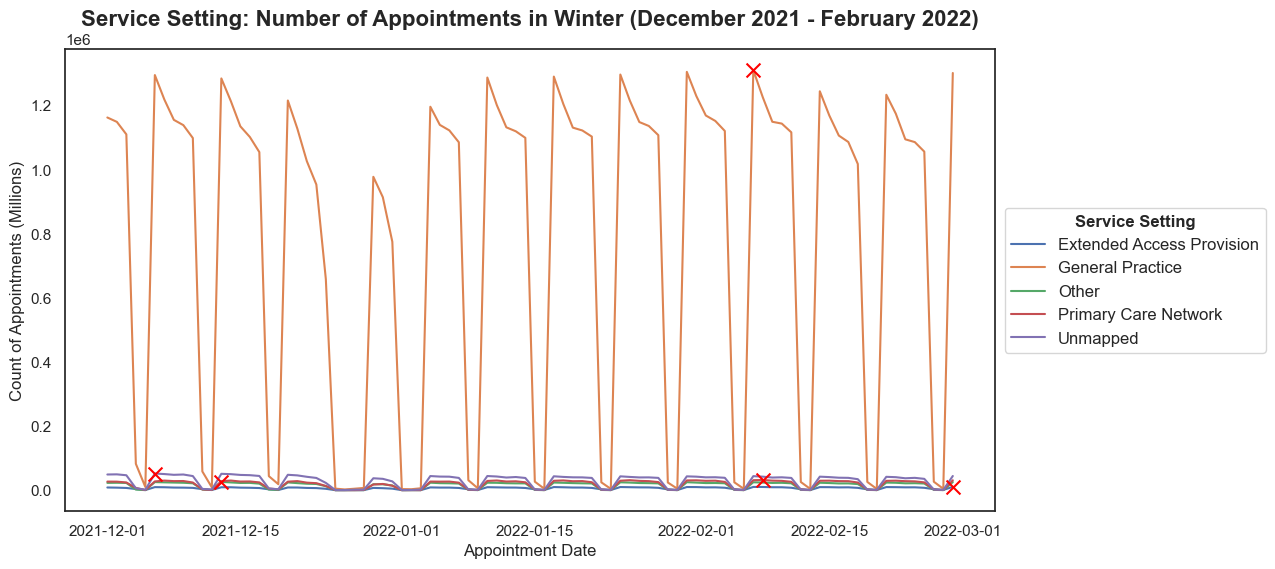

In [95]:
# Look at December to February 2022 in more detail to allow a closer look.
# Create a lineplot.

# Filter the data for the period from December 2021 to February 2022
nc_ss_day_dec_feb22 = nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-12-01') & (nc_ss_day['appointment_date'] <= '2022-02-28')]

# Create Lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=nc_ss_day_dec_feb22, x='appointment_date', y='count_of_appointments', hue='service_setting')

# Title and Axis Labels
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Setting: Number of Appointments in Winter (December 2021 - February 2022)", fontdict=title_font)

plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments (Millions)")

# Adding month labels at the bottom
months = nc_ss_day_dec_feb22['appointment_date'].dt.strftime('%Y-%m').unique()


# Finding and marking the peaks
peaks = nc_ss_day_dec_feb22.loc[nc_ss_day_dec_feb22.groupby('service_setting')['count_of_appointments'].idxmax()]
plt.scatter(peaks['appointment_date'], peaks['count_of_appointments'], color='red', marker='x', s=100, zorder=5)

# Legend Settings
legend_font = {'size': 12}
legend_nc_ss_day = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1.30, 0.5), prop=legend_font)
legend_nc_ss_day.get_title().set_fontweight('bold')

# Display the plot
plt.show()

**Spring (March to May 2022):**

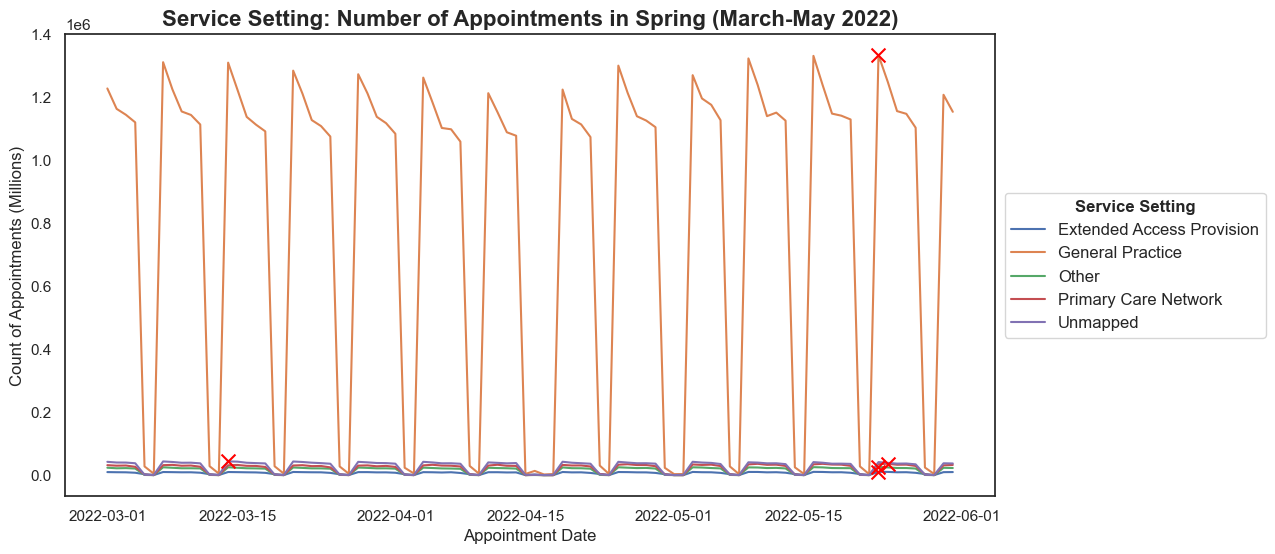

In [89]:
# Look at March to May 2022 in more detail to allow a closer look.
# Create a lineplot.
# Filter the data for the period from March to May 2022
nc_ss_day_mar_may22 = nc_ss_day[(nc_ss_day['appointment_date'] >= '2022-03-01') & (nc_ss_day['appointment_date'] <= '2022-05-31')]

# Create Lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=nc_ss_day_mar_may22, x='appointment_date', y='count_of_appointments', hue='service_setting')

# Title and Axis Labels
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Setting: Number of Appointments in Spring (March-May 2022)", fontdict=title_font)

plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments (Millions)")

# Adding month labels at the bottom
months = nc_ss_day_mar_may22['appointment_date'].dt.strftime('%Y-%m').unique()

# Finding and marking the peaks
peaks = nc_ss_day_mar_may22.loc[nc_ss_day_mar_may22.groupby('service_setting')['count_of_appointments'].idxmax()]
plt.scatter(peaks['appointment_date'], peaks['count_of_appointments'], color='red', marker='x', s=100, zorder=5)

# Legend Settings
legend_font = {'size': 12}
legend_nc_ss_day = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1.30, 0.5), prop=legend_font)
legend_nc_ss_day.get_title().set_fontweight('bold')

# Display the plot
plt.show()

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [165]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [105]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [113]:
# Explore the metadata.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [111]:
# Explore the data set.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [ ]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
The data is accurate when examining retweeted and favorited tweet messages, so it will be helpful in obtaining this information as 
it indicates that the service is more widely used, indicating a greater need for improvement. Nevertheless, the boolean logic is flawed 
because count values with a number 1 appear as false when they should should in fact appear as true. 

In [107]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']].copy()


# View the DataFrame.
display(tweets_text)

,tweet_full_text
0,As Arkansas’ first Comprehensive Stroke Certif...
1,RT @AndreaGrammer: Work-life balance is at the...
2,RT @OntarioGreens: $10 billion can go a long w...
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...
4,ICYMI: Our recent blogs on Cybersecurity in Ac...
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Repor...
1170,Not a cent towards workers who would like to a...
1171,"The @hfmaorg Region 9 presents ""The Value of E..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...


In [121]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for tweet in tweets['tweet_full_text']:
    words = tweet.split(' ')
    for word in words:
        if word.startswith('#'):
            tags.append(word.lower())

# Create a Pandas Series to count the values in the 'tags' list 
tags = pd.Series(tags)

# Use value_counts() to get the count of occurrences for each unique value
value_counts_tags = tags.value_counts()

In [123]:
# Display the first 30 records.
value_counts_tags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#marketing                      25
#pharma                         25
#medtwitter                     24
#competitiveintelligence        24
#biotech                        24
#meded                          23
#hiring                         18
#vaccine                        18
#technology                     17
#machinelearning                17
#news                           17
#coronavirus                    16
#womeninmedicine                16
#competitivemarketing           16
#covid                          16
#wellness                       15
#healthtech                     15
#covid19                        14
#medicare                       14
#doctorofveterinarym

In [185]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(value_counts_tags, columns=['count'])

#reset the index of the DataFrame
data.reset_index(inplace=True)

# Rename the columns to 'hashtag' and 'count'
data.rename(columns = {'index': 'hashtag'}, inplace=True)

display(data)

,hashtag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1457,#safesex,1
1458,#reproductivehealth,1
1459,#clincalresearch,1
1460,#southernclinicalresearchassociates,1


In [187]:
# Fix the count datatype.
data['count'] = data['count'].astype(int)

# View the result.
data.dtypes

hashtag    object
count       int64
dtype: object

In [129]:
# Display records where the count is larger than 10.
filtered_data = data[data['count'] > 10]
display(filtered_data)

,count
#healthcare,716
#health,80
#medicine,41
#ai,40
#job,38
#medical,35
#strategy,30
#pharmaceutical,28
#digitalhealth,25
#marketing,25


In [349]:
# Create a Seaborn barplot indicating records with a count >10 records.
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter

# include only records with count greater than 12
filtered_data = data[data['count'] > 12]


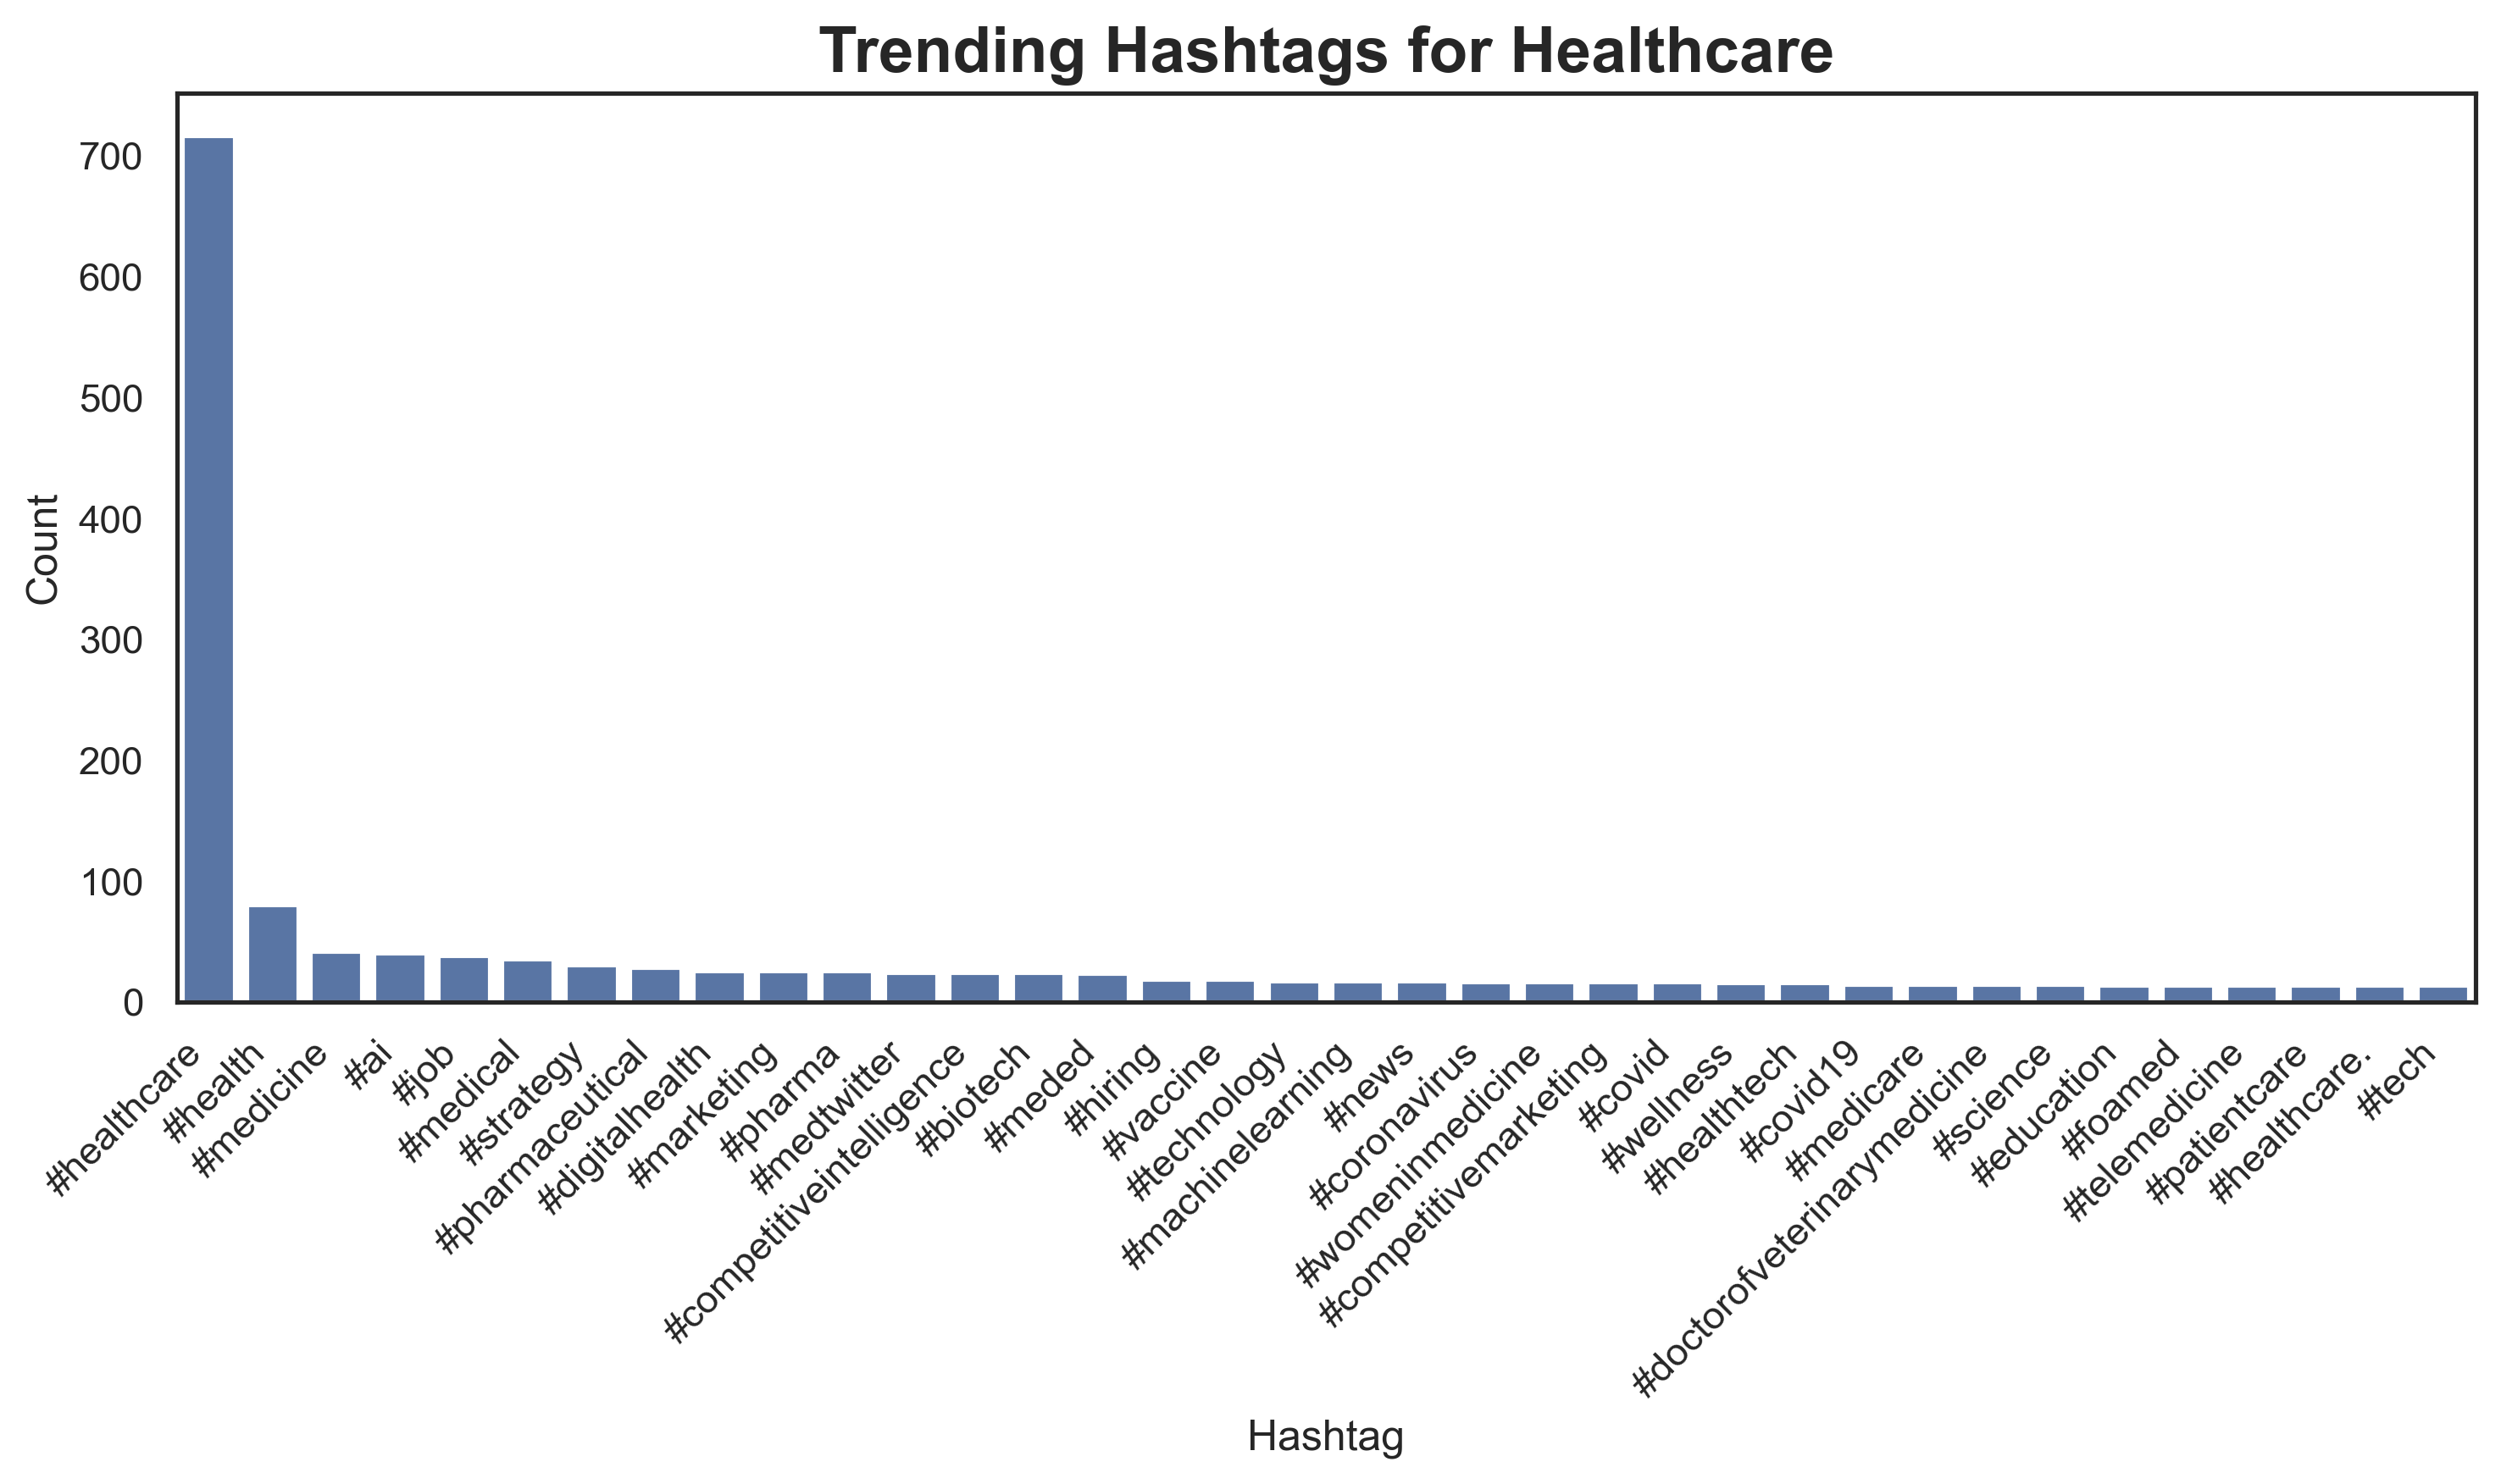

In [193]:
# Create the plot.
# Set up the figure
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x='hashtag', y='count', data=filtered_data)

# Customise the plot
plt.title('Trending Hashtags for Healthcare', fontsize=18, fontweight='bold')
plt.xlabel('Hashtag')
plt.ylabel('Count')

# Rotate the x-axis labels 
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Save the plot to a file (e.g., PNG) for use in PowerPoint
# plt.savefig('hashtag_counts.png', dpi=300, bbox_inches='tight')

# View the barplot.
plt.show()




# 

# Assignment activity 6

### Make recommendations to the NHS. 

In [197]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
display(ar)
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [199]:
# Print the min and max dates.
print(f"Earliest Month in Appointments Regional Data Set:", ar.appointment_month.min())
print(f"Latest Month in Appointments Regional Data Set:", ar.appointment_month.max())

Earliest Month in Appointments Regional Data Set: 2020-01
Latest Month in Appointments Regional Data Set: 2022-06


In [253]:
# Filter the data set to only look at data from 2021-08 onwards.
filtered_ar_df = ar_df[ar_df['appointment_month'] >= '2021-08-01']

# Display the filtered dataframe
filtered_ar_df.head()

,appointment_month,count_of_appointments,average_utilization,average_utilisation
20,2021-09,28522501,9.507500e+05,950750.0
21,2021-10,30303834,1.010128e+06,1010127.8
22,2021-11,30405070,1.013502e+06,1013502.3
23,2021-12,25140776,8.380259e+05,838025.9
24,2022-01,25635474,8.545158e+05,854515.8


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [269]:
# Create an aggregated data set to review the different features.
ar_agg_all = filtered_ar_df
ar_agg_all_grouped = ar.groupby(['appointment_month', 'appointment_status', 'hcp_type', 'appointment_mode', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()
# View the DataFrame.
ar_agg_all_grouped


,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2020-01,Attended,GP,Face-to-Face,1 Day,653846
1,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,620789
2,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,1723834
3,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,421189
4,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,1123186
...,...,...,...,...,...,...
10134,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
10135,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
10136,2022-06,Unknown,Unknown,Unknown,Same Day,1914
10137,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [271]:
# Determine the total number of appointments per month.
ar_df = ar_agg_all.groupby('appointment_month')['count_of_appointments'].sum().reset_index()


# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['average_utilization'] = ar_df['count_of_appointments'] / 30

# Round to 1 decilmal place
ar_df['average_utilisation'] = (ar_df['count_of_appointments'] / 30).round(1)

# View the DataFrame.
ar_df
ar_df.head()

,appointment_month,count_of_appointments,average_utilization,average_utilisation
0,2021-09,28522501,9.507500e+05,950750.0
1,2021-10,30303834,1.010128e+06,1010127.8
2,2021-11,30405070,1.013502e+06,1013502.3
3,2021-12,25140776,8.380259e+05,838025.9
4,2022-01,25635474,8.545158e+05,854515.8


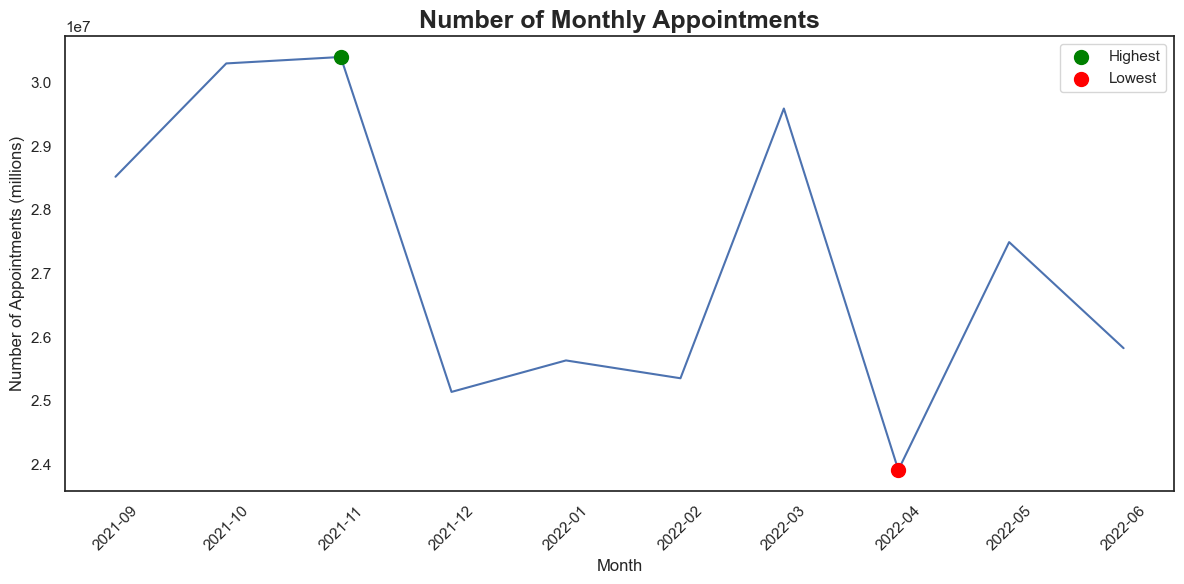

In [347]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.

# Convert the 'appointment_month' column to datetime format
ar_df['appointment_month'] = pd.to_datetime(ar_df['appointment_month'], format='%Y-%m')

# Filter the data to include only records from August 2021 onwards
filtered_ar_df = ar_df[ar_df['appointment_month'] >= '2021-08-01']

# Aggregate the number of appointments by month
monthly_appointments = ar_df.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Find the highest and lowest points
max_point = monthly_appointments.loc[monthly_appointments['count_of_appointments'].idxmax()]
min_point = monthly_appointments.loc[monthly_appointments['count_of_appointments'].idxmin()]

# Create a line plot with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_appointments, x='appointment_month', y='count_of_appointments')

# Highlight the highest point in green
plt.scatter(max_point['appointment_month'], max_point['count_of_appointments'], color='green', s=100, zorder=5, label='Highest')

# Highlight the lowest point in red
plt.scatter(min_point['appointment_month'], min_point['count_of_appointments'], color='red', s=100, zorder=5, label='Lowest')

# Customize the plot
plt.title('Number of Monthly Appointments', fontsize=18, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (millions)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Figure size 1440x720 with 0 Axes>

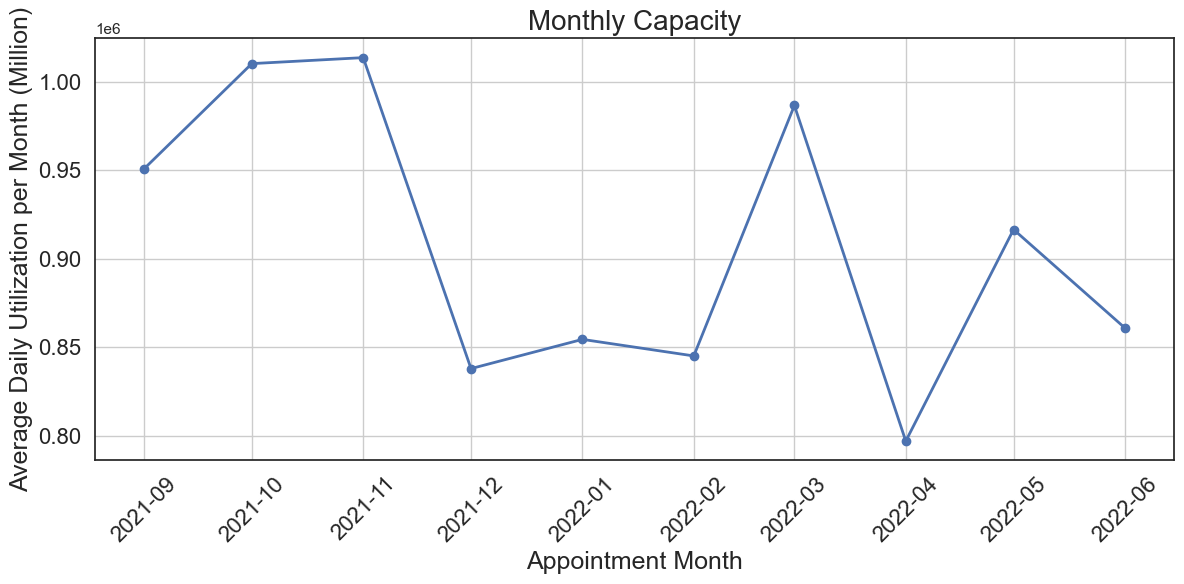

In [343]:
# Plot monthly capacity utilisation.
plt.figure(figsize=(15,7.5), dpi=96)

# Ensure the 'appointment_month' column is in datetime format
ar_df['appointment_month'] = pd.to_datetime(ar_df['appointment_month'], format='%Y-%m')

# Filter the data to include only records from August 2021 onwards
filtered_ar_df = ar_df[ar_df['appointment_month'] >= '2021-08-01']

# Calculate the average daily utilization per month
filtered_ar_df['average_utilisation'] = filtered_ar_df['count_of_appointments'] / 30

# Plotting the monthly capacity utilization
plt.figure(figsize=(12, 6))
plt.plot(filtered_ar_df['appointment_month'], filtered_ar_df['average_utilisation'], marker='o', linestyle='-', linewidth=2)

# Customize the plot
plt.xlabel('Appointment Month', fontsize=18)
plt.ylabel('Average Daily Utilization per Month (Million)', fontsize=18)
plt.title('Monthly Capacity', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

# Display the line plot
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

In [309]:
# Create a line plot to answer the question.
# Ensure the 'appointment_month' column is in datetime format
hcp_trends = ar['hcp_type'].unique()
print(unique_hcp_types)

['GP' 'Other Practice staff' 'Unknown']


In [313]:
# Select and group the relevant columns
ar_hcp = ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Display the table data
display(ar_hcp)
ar_hcp.head()

,appointment_month,hcp_type,count_of_appointments
0,2020-01,GP,14168932
1,2020-01,Other Practice staff,12326031
2,2020-01,Unknown,704333
3,2020-02,GP,12467976
4,2020-02,Other Practice staff,11002550
...,...,...,...
85,2022-05,Other Practice staff,12823200
86,2022-05,Unknown,878374
87,2022-06,GP,12893983
88,2022-06,Other Practice staff,12105677


,appointment_month,hcp_type,count_of_appointments
0,2020-01,GP,14168932
1,2020-01,Other Practice staff,12326031
2,2020-01,Unknown,704333
3,2020-02,GP,12467976
4,2020-02,Other Practice staff,11002550


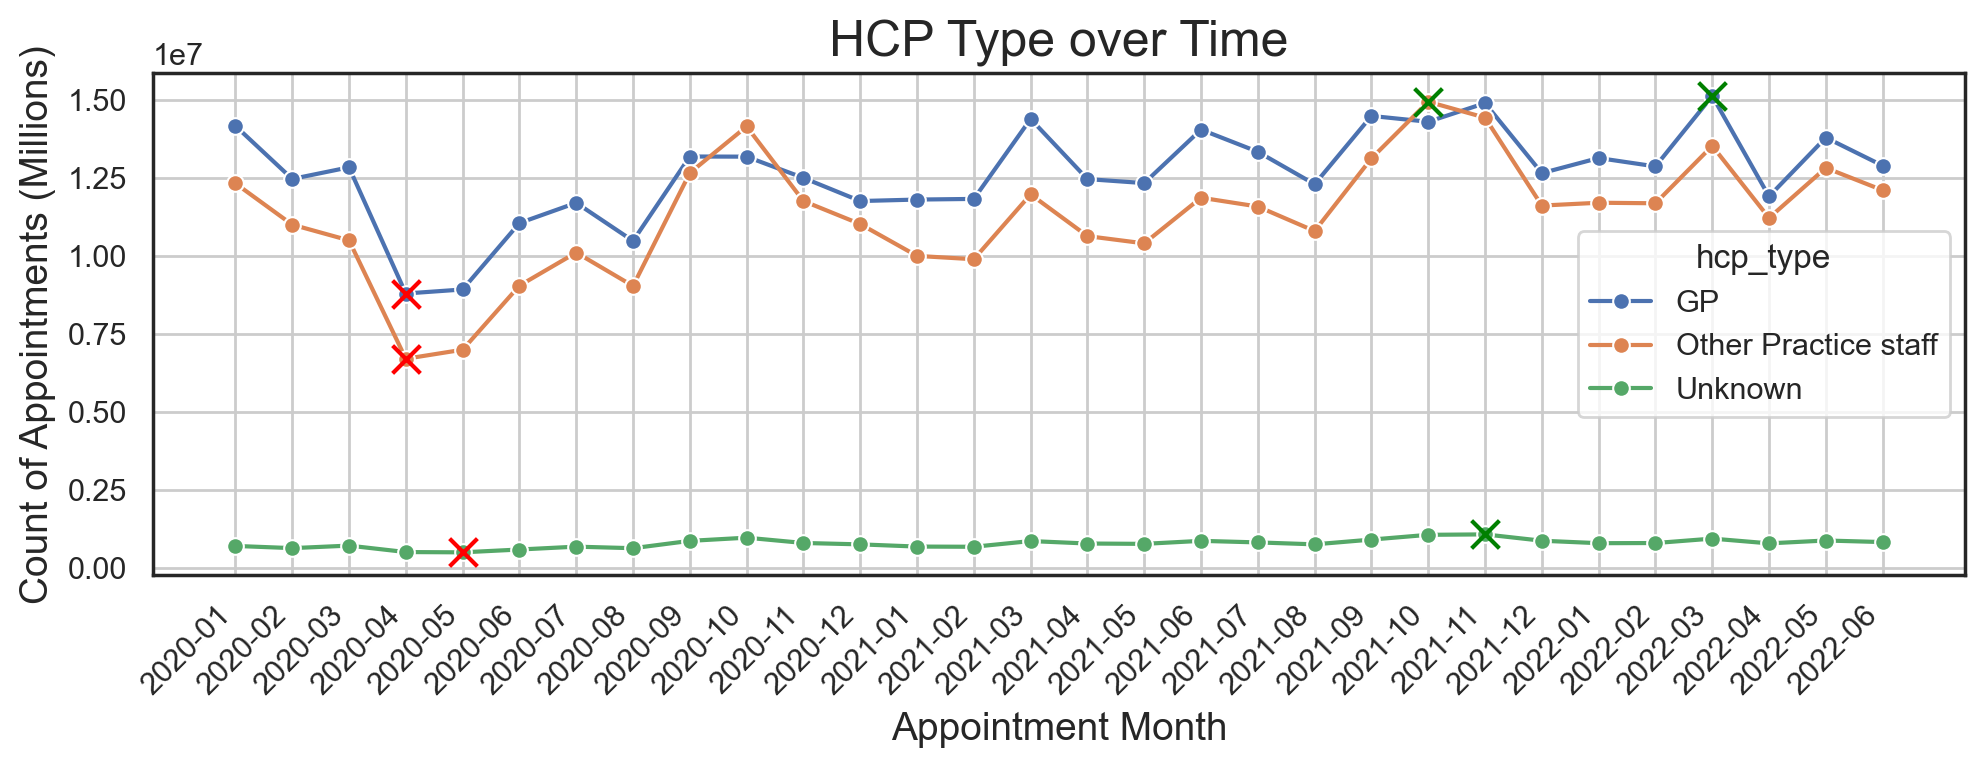

In [365]:
# Set the figure size (for PowerPoint)
# Group the relevant columns
plt.figure(figsize=(10, 4), dpi=200)

# Create the line plot using Seaborn.
sns.lineplot(data=ar_hcp, x='appointment_month', y='count_of_appointments', hue='hcp_type', marker='o', ci=None)

# Find and mark the highest and lowest points for each healthcare professional type
for hcp_type in ar_hcp['hcp_type'].unique():
    hcp_data = ar_hcp[ar_hcp['hcp_type'] == hcp_type]
    max_point = hcp_data.loc[hcp_data['count_of_appointments'].idxmax()]
    min_point = hcp_data.loc[hcp_data['count_of_appointments'].idxmin()]
    
    # Mark the highest point with a green 'X'
    plt.scatter(max_point['appointment_month'], max_point['count_of_appointments'], color='green', s=100, zorder=5, marker='x', label=f'{hcp_type} Highest')
    
    # Mark the lowest point with a red 'X'
    plt.scatter(min_point['appointment_month'], min_point['count_of_appointments'], color='red', s=100, zorder=5, marker='x', label=f'{hcp_type} Lowest')

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments (Millions)', fontsize=14)
plt.title('HCP Type over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot.
plt.grid(True)

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Save the plot to a file (e.g., PNG) if you want to use it in PowerPoint.
# plt.savefig('hcp_type_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot (optional if you just want to save it to a file).
plt.show()

**Question 3:** Are there significant changes in whether or not visits are attended?

In [375]:
# Create a line plot to answer the question.
# Select and group the relevant columns
ar_as = ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()
ar_as.head()

,appointment_month,appointment_status,count_of_appointments
0,2020-01,Attended,24538291
1,2020-01,DNA,1298269
2,2020-01,Unknown,1362736
3,2020-02,Attended,21640067
4,2020-02,DNA,1215154


In [379]:
#first few rows to understand the format of 'appointment_month'
print(ar_df['appointment_month'].head())


0   2021-09-01
1   2021-10-01
2   2021-11-01
3   2021-12-01
4   2022-01-01
Name: appointment_month, dtype: datetime64[ns]


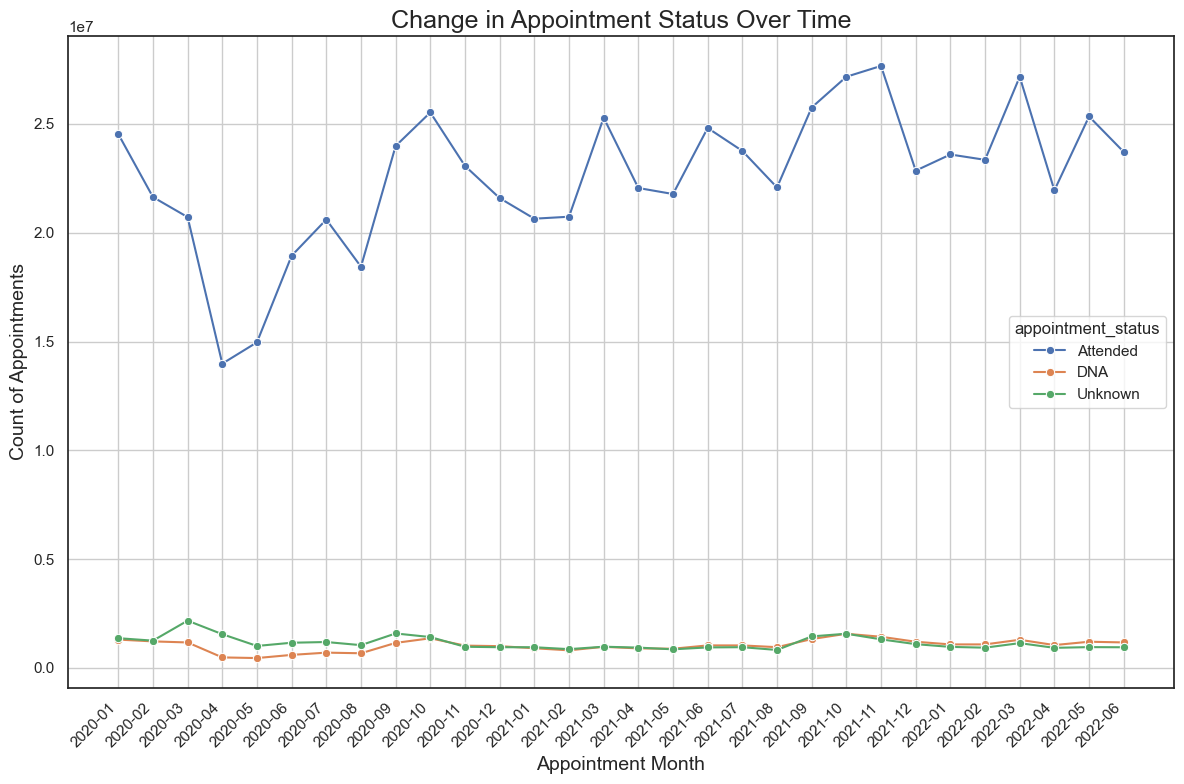

In [389]:
# Set the figure size
plt.figure(figsize=(12, 8))

# line plot using Seaborn to show how the status of appointments changes over time
sns.lineplot(data=ar_as, x='appointment_month', y='count_of_appointments', hue='appointment_status', marker='o')

# Customizing the plot
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments', fontsize=14)
plt.title('Change in Appointment Status Over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot
plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

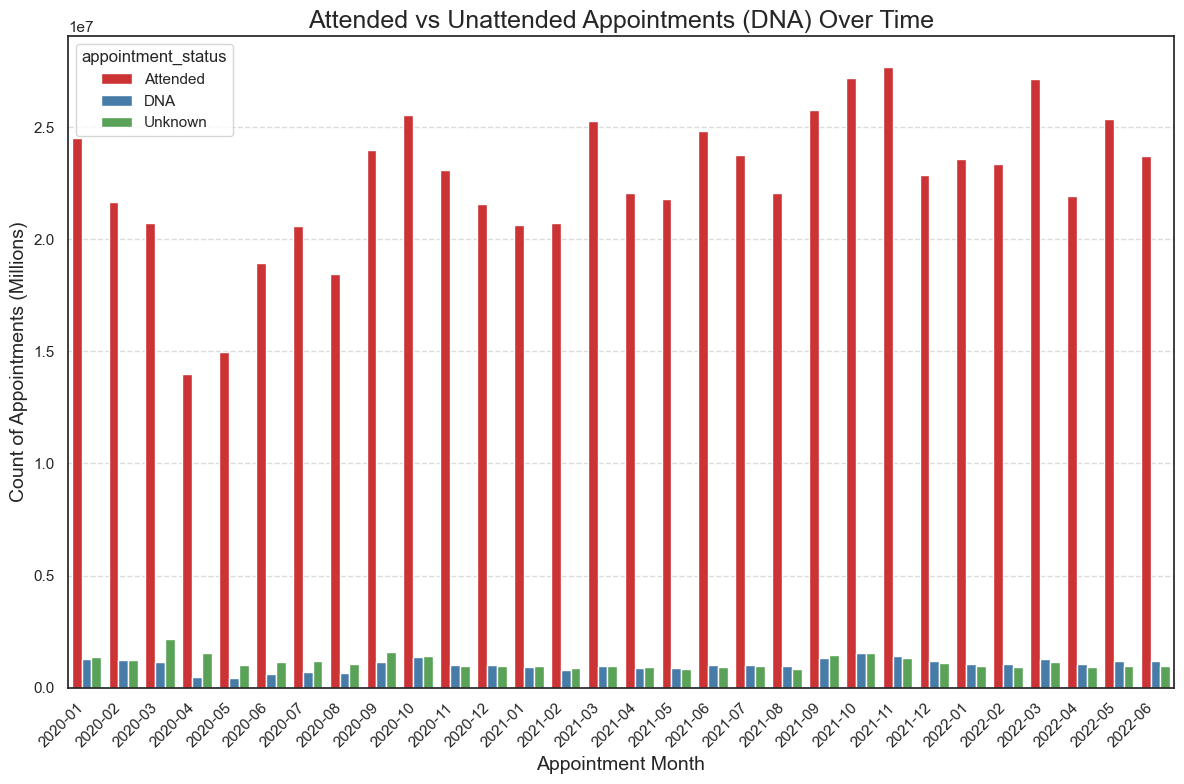

In [405]:
# Creating a bar chart to show attended vs unattended (DNA) overtime

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn to show attended vs unattended over time
sns.barplot(data=ar_as, x='appointment_month', y='count_of_appointments', hue='appointment_status', palette='Set1')

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments (Millions)', fontsize=14)
plt.title('Attended vs Unattended Appointments (DNA) Over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

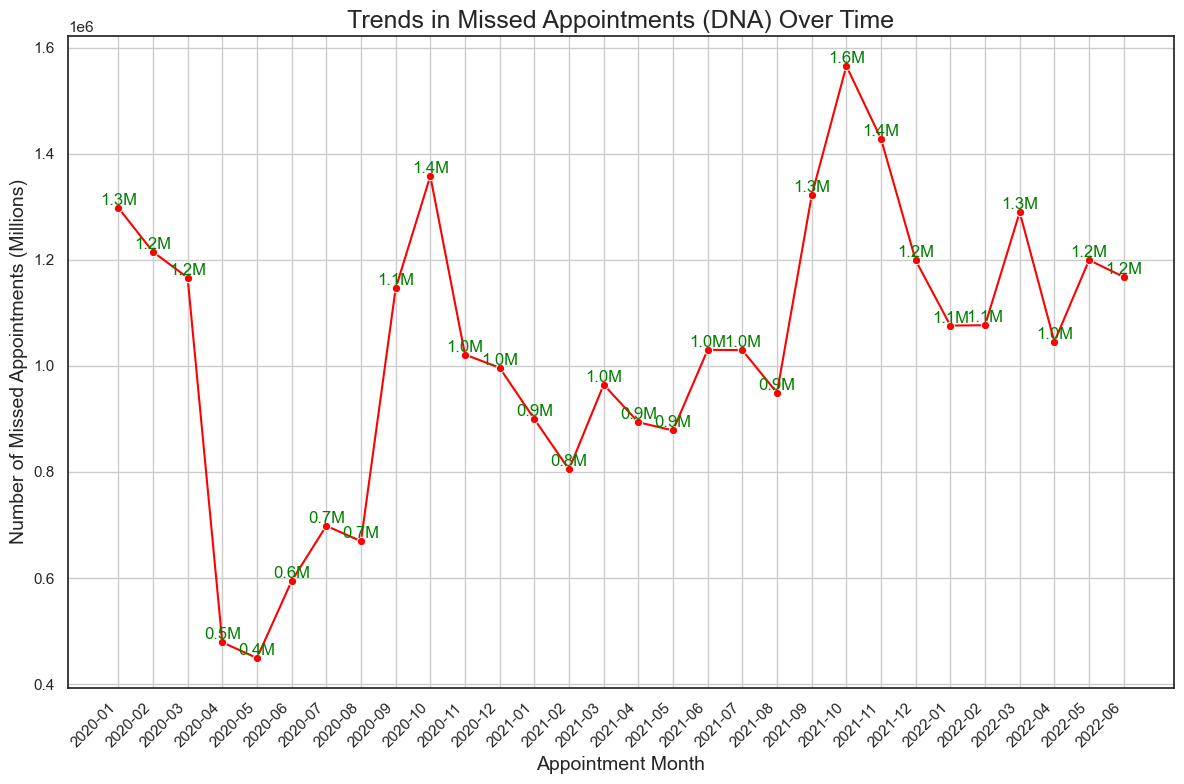

In [610]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a line plot to visualize the trend of missed appointments over time
sns.lineplot(data=missed_appointments_by_month, x='appointment_month', y='count_of_appointments', marker='o', color='red')

# Add numbers above each point in the format '1.5M'
for x, y in zip(missed_appointments_by_month['appointment_month'], missed_appointments_by_month['count_of_appointments']):
    plt.text(x=x, y=y, s=f'{y/1_000_000:.1f}M', color='green', ha='center', va='bottom', fontsize=12)

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Number of Missed Appointments (Millions)', fontsize=14)
plt.title('Trends in Missed Appointments (DNA) Over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [423]:
# Create a line plot to answer the question.
# Group by Appointment Month and Appointment Type
ar_at = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()
# Display the table data
ar_at.head()

,appointment_month,appointment_mode,count_of_appointments
0,2020-01,Face-to-Face,21733394
1,2020-01,Home Visit,266942
2,2020-01,Telephone,3701775
3,2020-01,Unknown,1302979
4,2020-01,Video/Online,194206


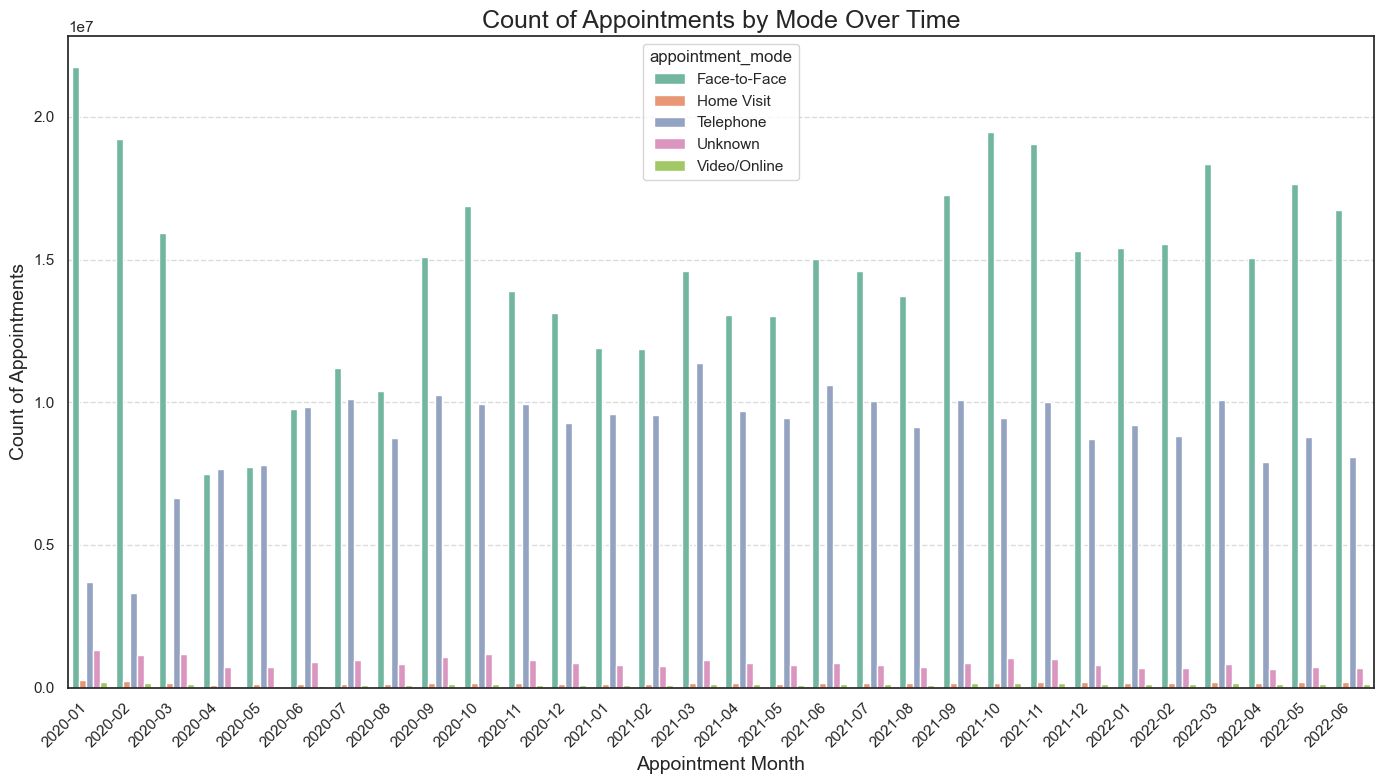

In [433]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot using Seaborn
sns.barplot(data=ar_at, x='appointment_month', y='count_of_appointments', hue='appointment_mode', palette='Set2')

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments', fontsize=14)
plt.title('Count of Appointments by Mode Over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [441]:
# Filter the data for telephone and face-to-face appointments
filtered_modes = ar[ar['appointment_mode'].isin(['Telephone', 'Face-to-Face'])]

# Group the data by appointment month and appointment mode
ar_modes = filtered_modes.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()


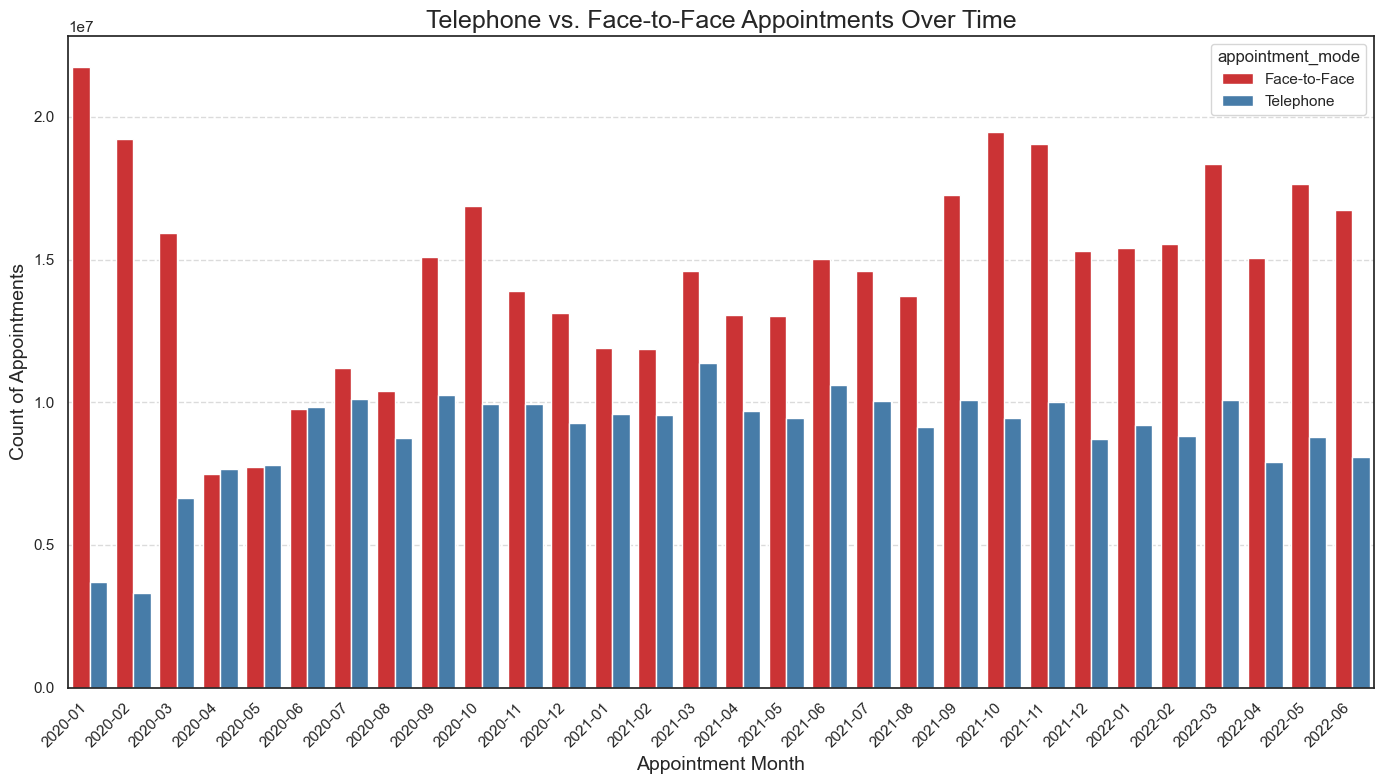

In [443]:
# Making a bar chart for telephone vs face to face as they were the closest competitors over time 
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot using Seaborn
sns.barplot(data=ar_modes, x='appointment_month', y='count_of_appointments', hue='appointment_mode', palette='Set1')

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments', fontsize=14)
plt.title('Telephone vs. Face-to-Face Appointments Over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Show the plot
plt.show()

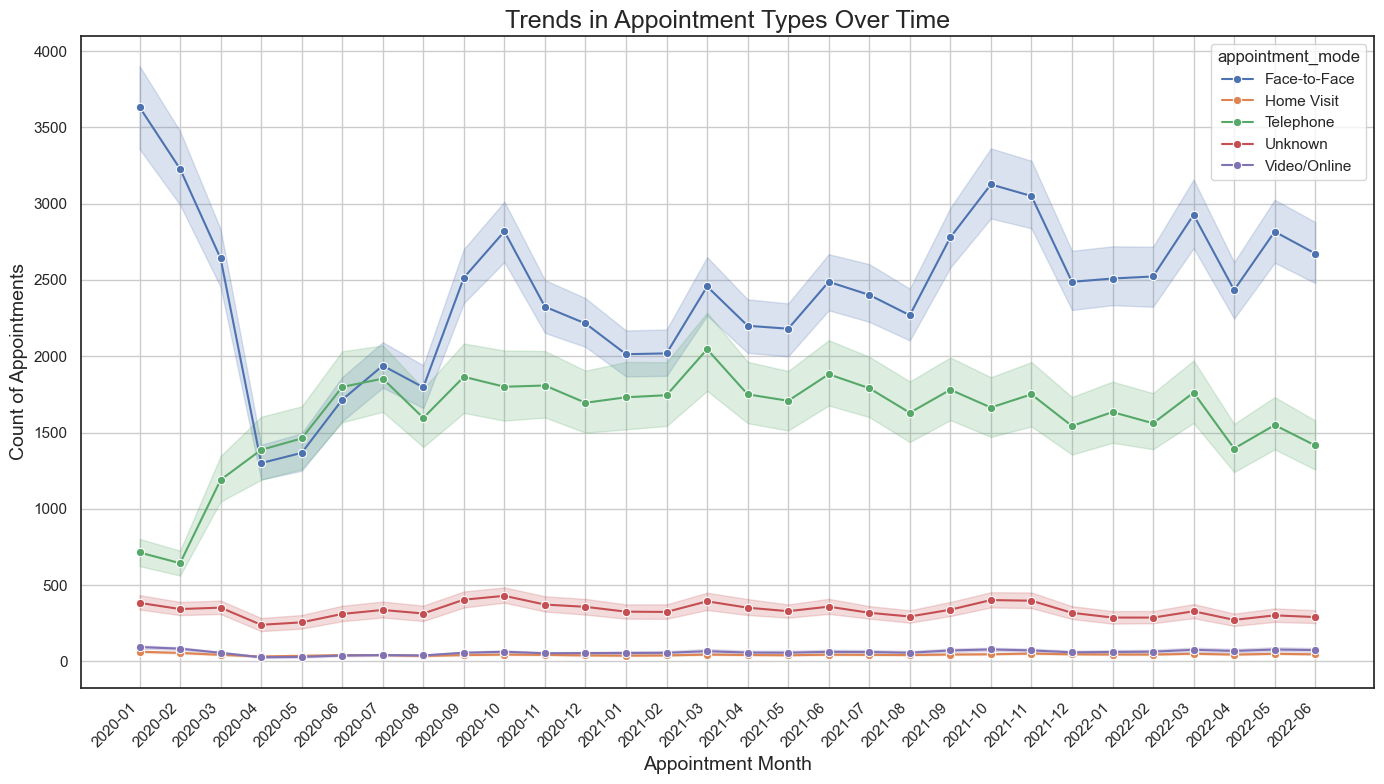

In [456]:
# Create a line chart with multiple lines for each appointment type
plt.figure(figsize=(14, 8))
sns.lineplot(data=ar, x='appointment_month', y='count_of_appointments', hue='appointment_mode', marker='o')

plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments', fontsize=14)
plt.title('Trends in Appointment Types Over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [494]:
appointments_by_month = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()


# Sort by the count of appointments to find the top 5 months
top_5_months = appointments_by_month.sort_values(by='count_of_appointments', ascending=False).head(5)


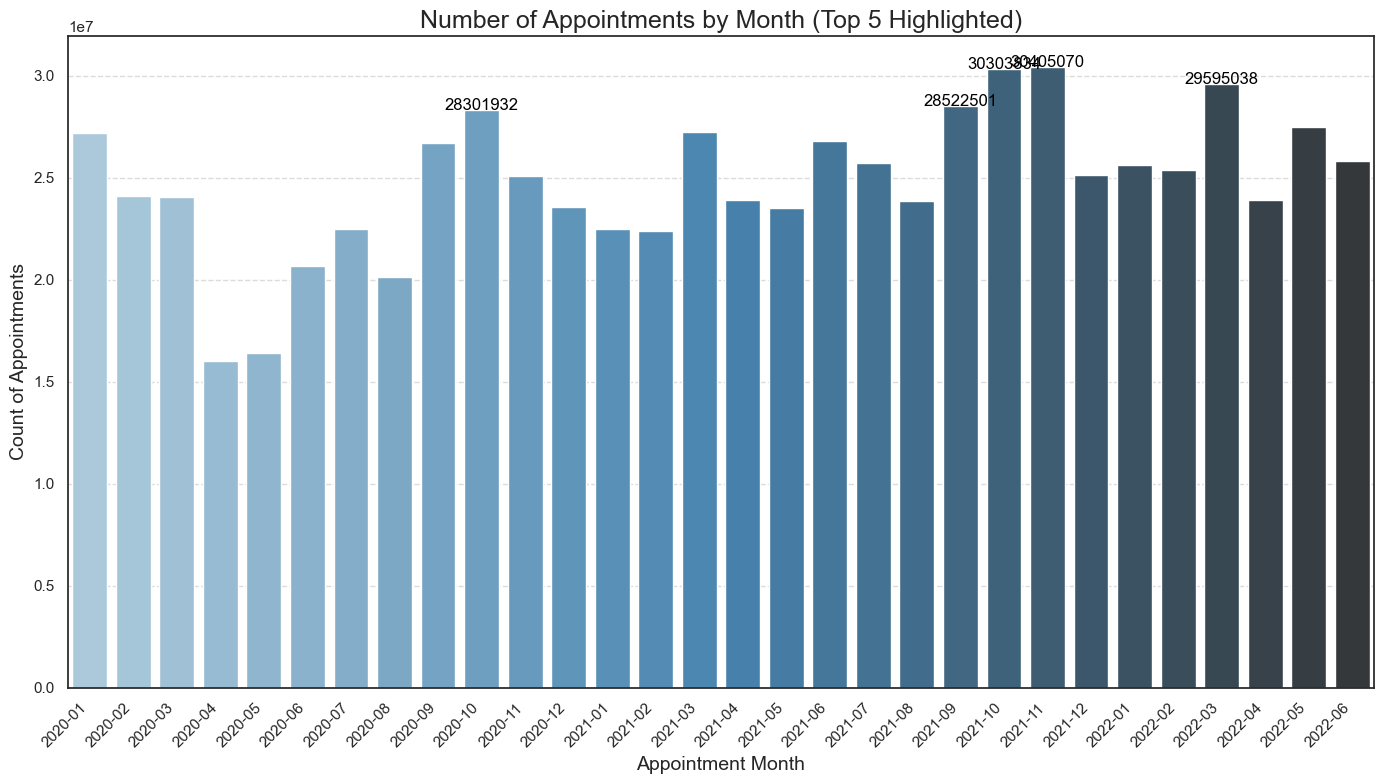

In [496]:

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot using Seaborn
barplot = sns.barplot(data=appointments_by_month, x='appointment_month', y='count_of_appointments', palette='Blues_d')

# Add the exact number of appointments on top of the bars for the top 5 months
for index, row in appointments_by_month.iterrows():
    if row['appointment_month'] in top_5_months['appointment_month'].values:
        barplot.text(index, row['count_of_appointments'], round(row['count_of_appointments'], 2), color='black', ha="center")

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments', fontsize=14)
plt.title('Number of Appointments by Month (Top 5 Highlighted)', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Show the plot
plt.show()


**Question 5:** Are there any trends in time between booking and appointment?

In [464]:
# Create a line plot to answer the question.
# Ensure the booking_date and appointment_date columns are in datetime format
ar['booking_date'] = pd.to_datetime(ar['appointment_month'], errors='coerce')
ar['appointment_date'] = pd.to_datetime(ar['appointment_month'], errors='coerce')

# Calculate the difference in days between booking and appointment
ar['days_between_booking_and_appointment'] = (ar['appointment_date'] - ar['booking_date']).dt.days


In [468]:
# Group by appointment month and calculate the average days between booking and appointment
ar_time_diff = ar.groupby('appointment_month')['days_between_booking_and_appointment'].mean().reset_index()
ar_time_diff.head()


,appointment_month,days_between_booking_and_appointment
0,2020-01,0.0
1,2020-02,0.0
2,2020-03,0.0
3,2020-04,0.0
4,2020-05,0.0


In [504]:
# New column for 10-day intervals
ar['10_day_interval'] = ar['appointment_date'].dt.to_period('10D').dt.start_time

# Group by 10-day intervals and calculate the sum of appointments
appointments_by_interval = ar.groupby('10_day_interval')['count_of_appointments'].sum().reset_index()

# Convert the count of appointments to millions
appointments_by_interval['count_of_appointments'] = appointments_by_interval['count_of_appointments'] / 1_000_000


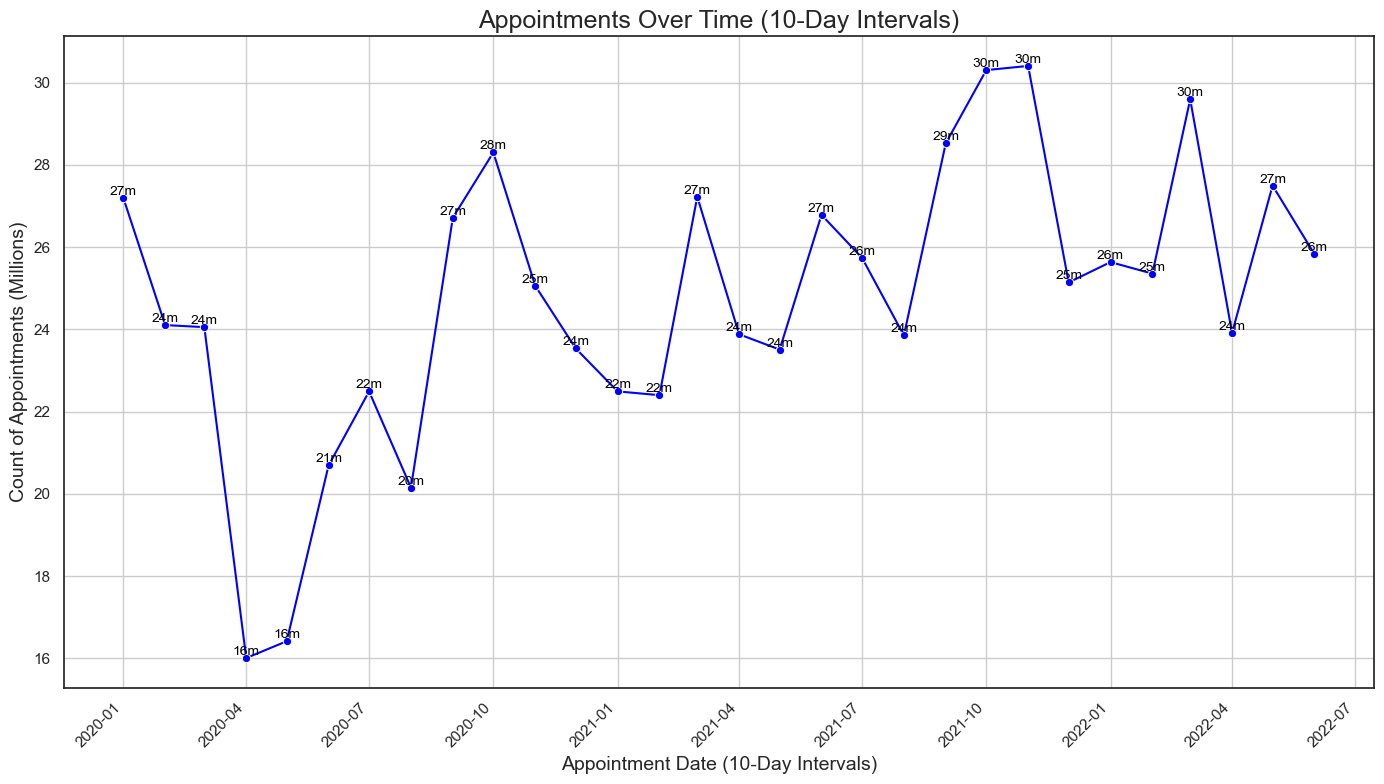

In [508]:
# Create a line plot to answer the question.
# Set the figure size

plt.figure(figsize=(14, 8))

# Create a line plot using Seaborn
lineplot = sns.lineplot(data=appointments_by_interval, x='10_day_interval', y='count_of_appointments', marker='o', color='blue')

# Add labels above each point
for x, y in zip(appointments_by_interval['10_day_interval'], appointments_by_interval['count_of_appointments']):
    plt.text(x=x, y=y, s=f'{y:.0f}m', color='black', ha='center', va='bottom', fontsize=10)

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Date (10-Day Intervals)', fontsize=14)
plt.ylabel('Count of Appointments (Millions)', fontsize=14)
plt.title('Appointments Over Time (10-Day Intervals)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Show the plot
plt.show()

**Question 6:** How do the various service settings compare?

In [510]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
display(nc)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [512]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# View the DataFrame.


# Convert the 'appointment_date' column to datetime format if not already done
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Extract the month from the appointment_date
nc['appointment_month'] = nc['appointment_date'].dt.to_period('M')

# Group by the month and calculate the number of appointments
appointments_by_month_nc = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# View the new DataFrame
appointments_by_month_nc.head()

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776


In [646]:
# View unique values in the 'service_setting' column.
unique_service_setting = nc['service_setting'].unique()
print(unique_service_setting)

# Take out month from the appointment_date
nc['appointment_month'] = nc['appointment_date'].dt.to_period('M')

['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


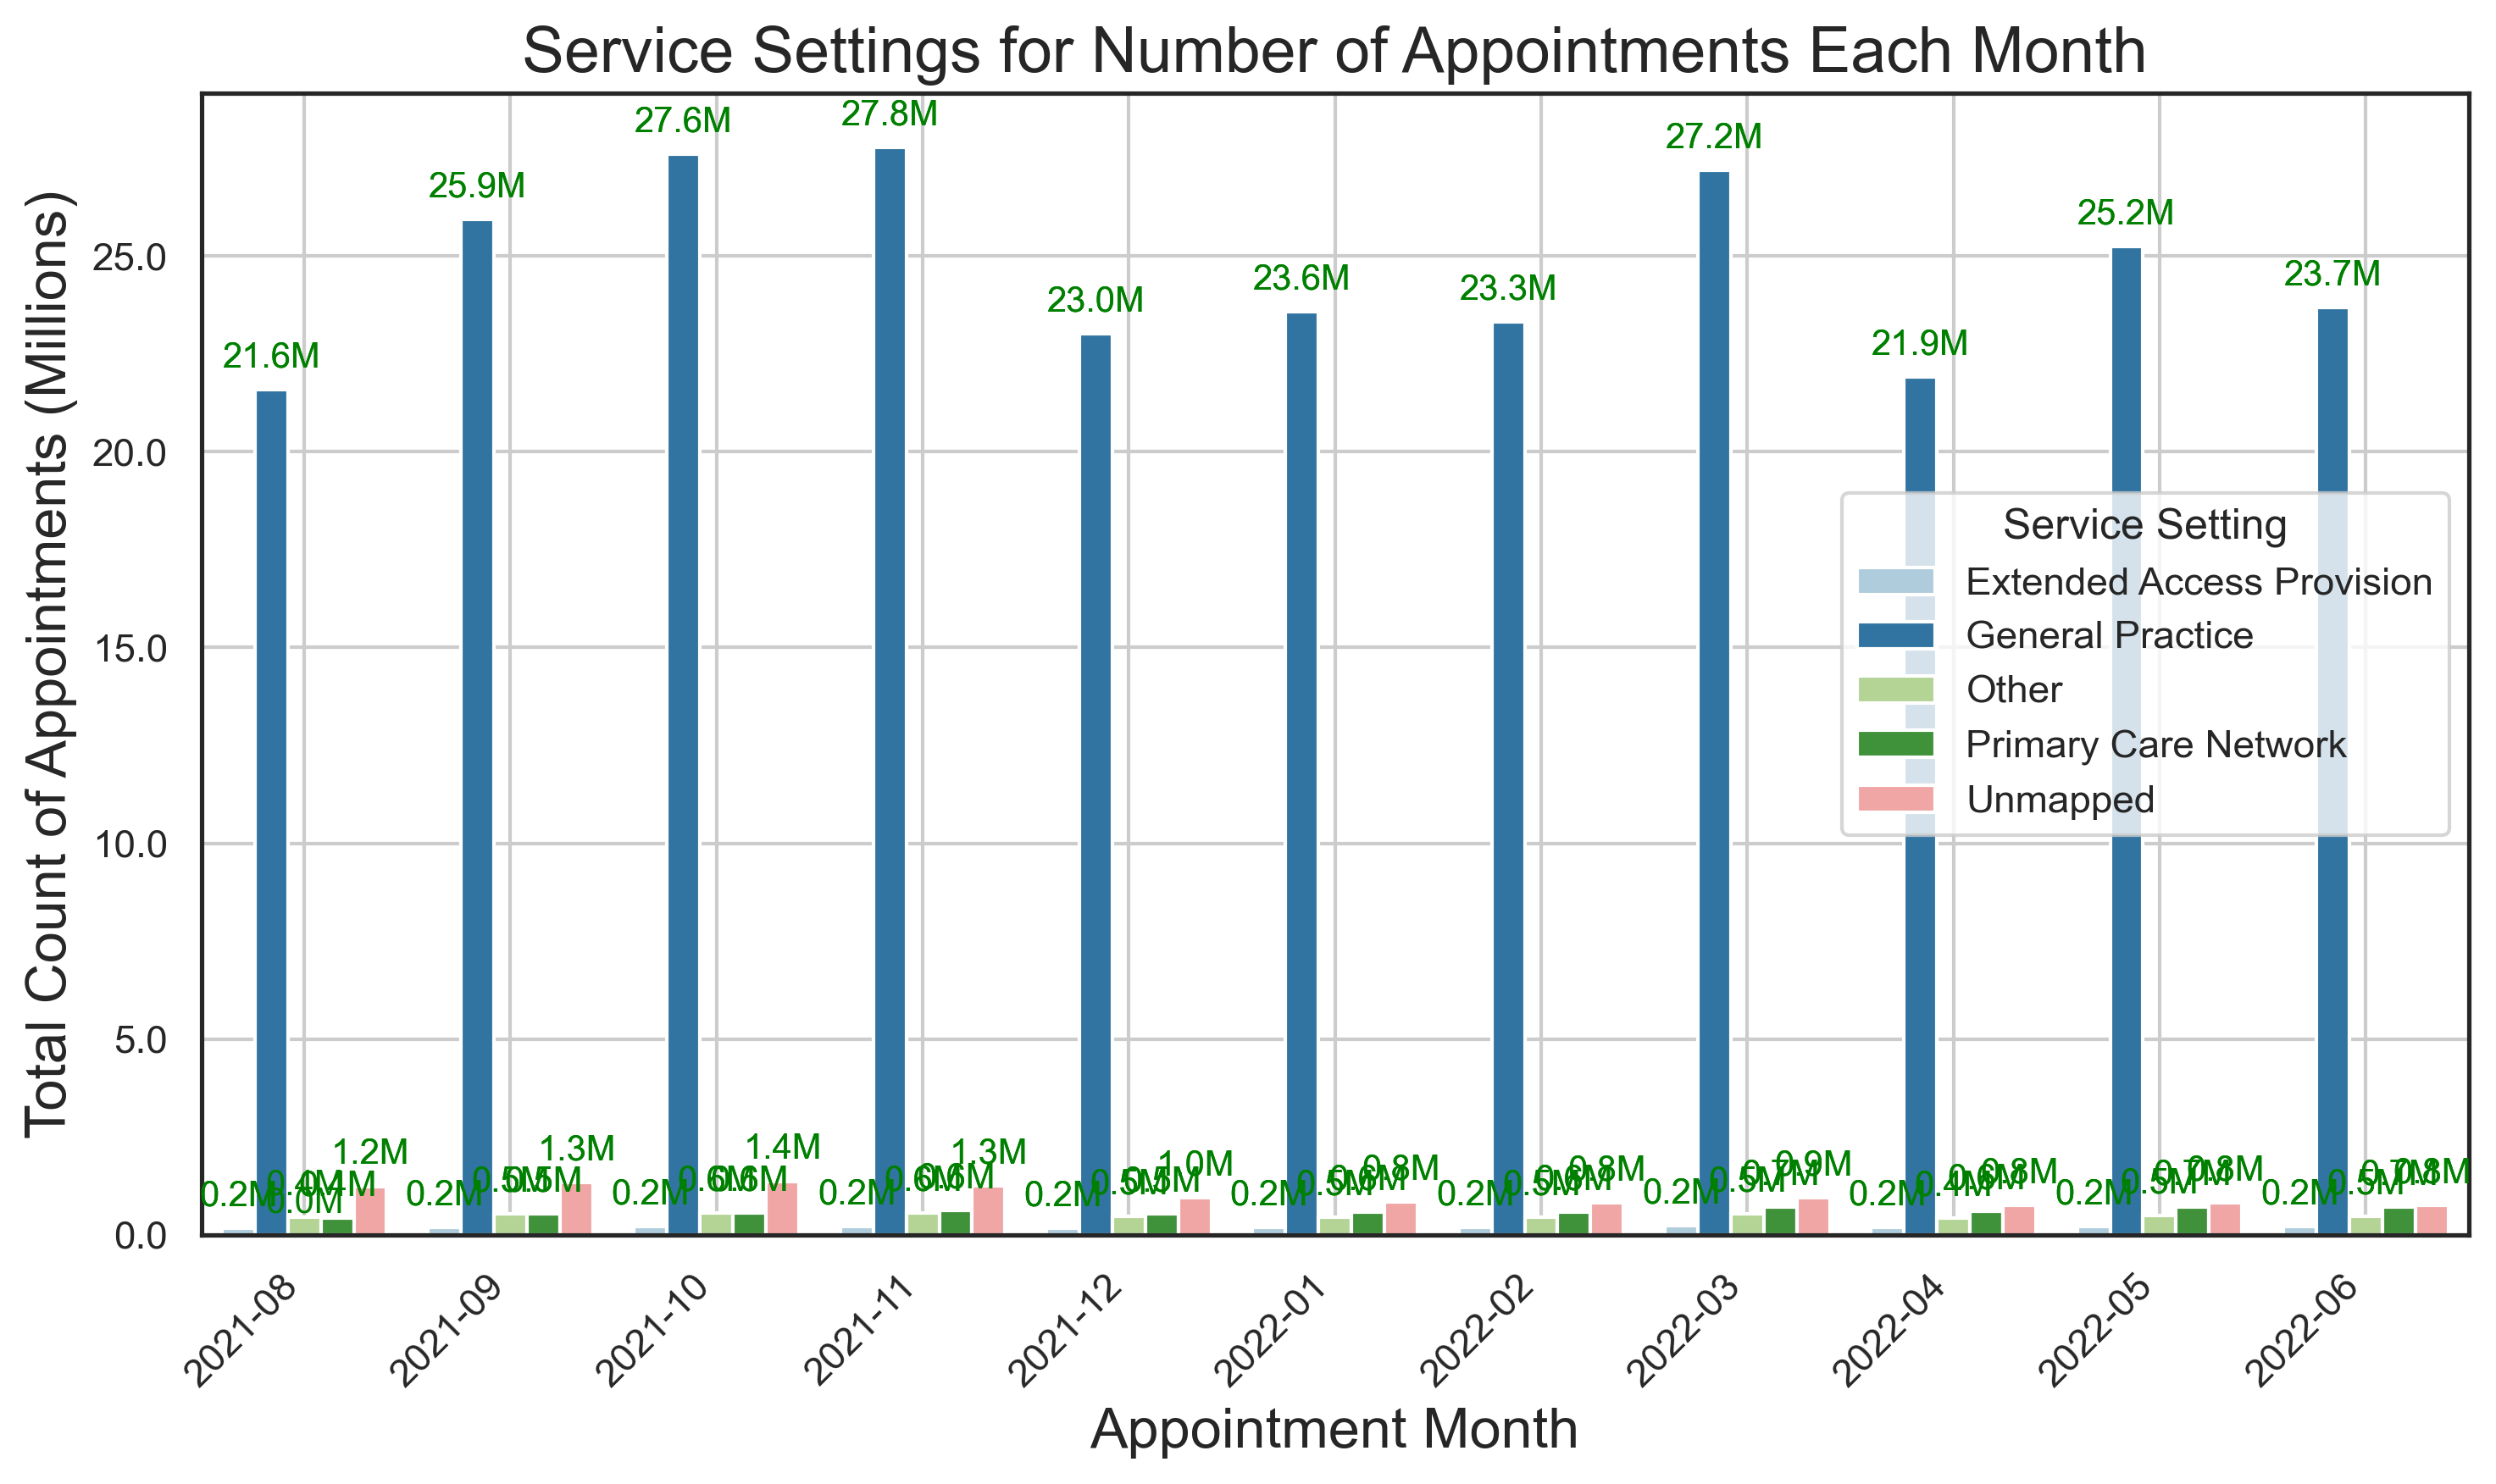

In [666]:
# Filter the data to only include the specified service settings
filtered_nc = nc[nc['service_setting'].isin(['Extended Access Provision', 'General Practice', 'Other', 'Primary Care Network', 'Unmapped'])]

# Group by 'appointment_month' and calculate the sum of 'count_of_appointments' for each month and service setting
nc_new = filtered_nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Set the figure size for the plot
plt.figure(figsize=(10, 6), dpi=300)

# Create a bar plot using Seaborn with the default colors
barplot = sns.barplot(data=nc_new, x='appointment_month', y='count_of_appointments', hue='service_setting')

# Group the patches (bars) by 'appointment_month'
grouped = {}
for p in barplot.patches:
    month = p.get_x() + p.get_width() / 2
    if month not in grouped:
        grouped[month] = []
    grouped[month].append(p)

# Annotate the highest and lowest bars for each month
for month, patches in grouped.items():
    # Sort the patches by height to easily access the highest and lowest
    patches_sorted = sorted(patches, key=lambda p: p.get_height())
    
    # Annotate the lowest bar (first in sorted list)
    lowest_bar = patches_sorted[0]
    barplot.annotate(f'{lowest_bar.get_height() / 1_000_000:.1f}M', 
                     (lowest_bar.get_x() + lowest_bar.get_width() / 2., lowest_bar.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     color='green',
                     fontsize=10)
    
    # Annotate the highest bar (last in sorted list)
    highest_bar = patches_sorted[-1]
    barplot.annotate(f'{highest_bar.get_height() / 1_000_000:.1f}M', 
                     (highest_bar.get_x() + highest_bar.get_width() / 2., highest_bar.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     color='green',
                     fontsize=10)

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Total Count of Appointments (Millions)', fontsize=16)
plt.title('Service Settings for Number of Appointments Each Month', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot
plt.grid(True)

# Show the legend
plt.legend(title='Service Setting', loc='center right')

# Format the y-axis tick labels to show values in millions
formatter = FuncFormatter(lambda x, _: '{:.1f}'.format(x / 1_000_000))
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.show()

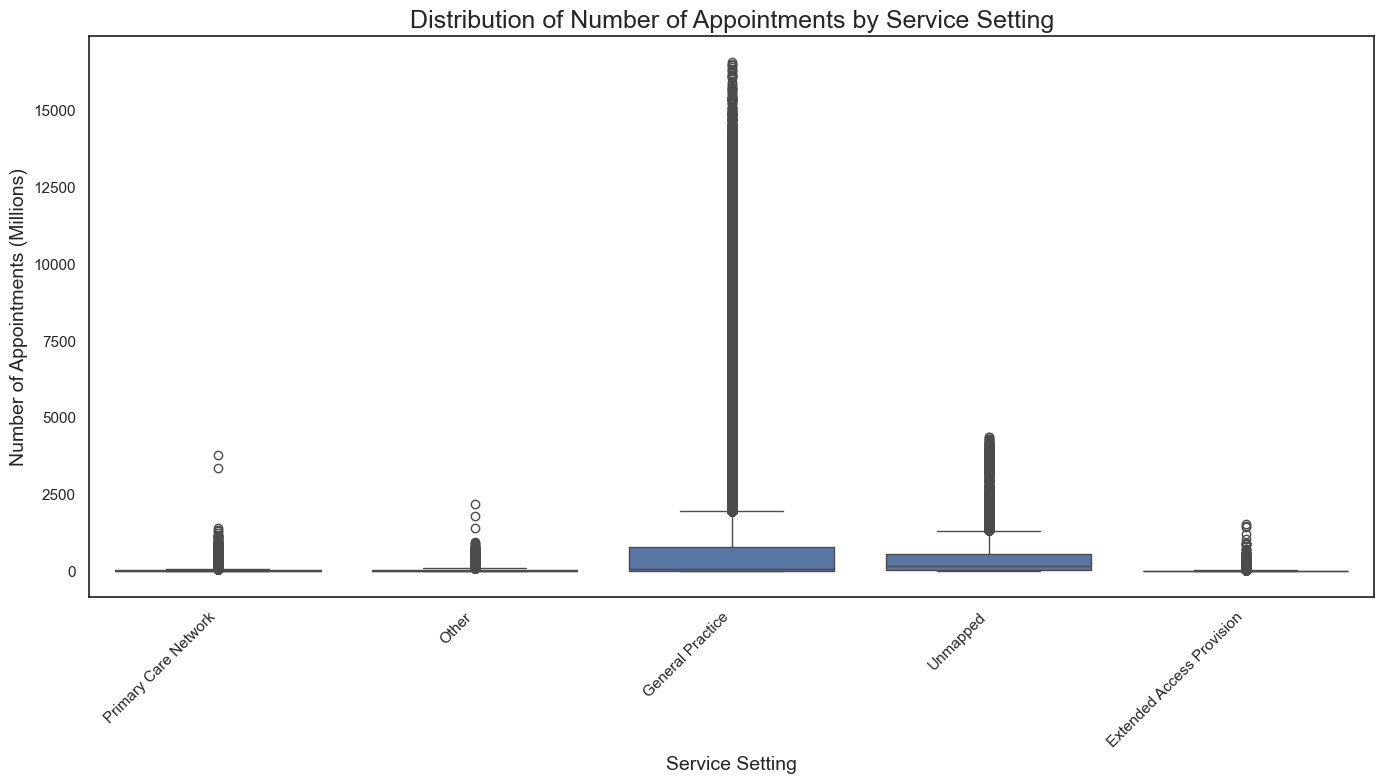

In [522]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=nc, x='service_setting', y='count_of_appointments')

# Customize the plot
plt.xlabel('Service Setting', fontsize=14)
plt.ylabel('Number of Appointments (Millions)', fontsize=14)
plt.title('Distribution of Number of Appointments by Service Setting', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [526]:
# Filter out GP visits
# Replaced 'GP' with the exact label for GP visits 
nc_filtered = nc[nc['service_setting'] != 'GP'] 

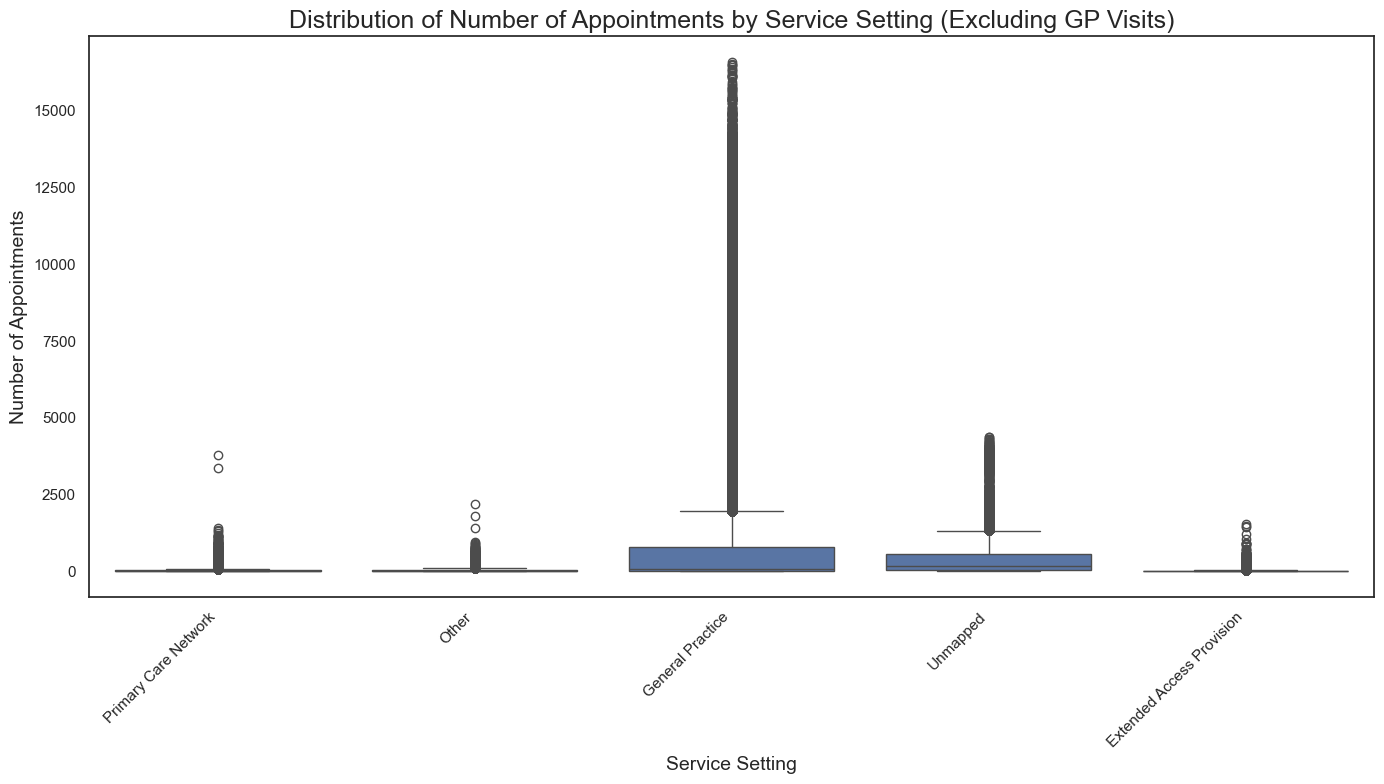

In [630]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
# Create the boxplot excluding GP visits
# Create the boxplot excluding GP visits
plt.figure(figsize=(14, 8))
sns.boxplot(data=nc_filtered, x='service_setting', y='count_of_appointments')

# Customize the plot
plt.xlabel('Service Setting', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.title('Distribution of Number of Appointments by Service Setting (Excluding GP Visits)', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

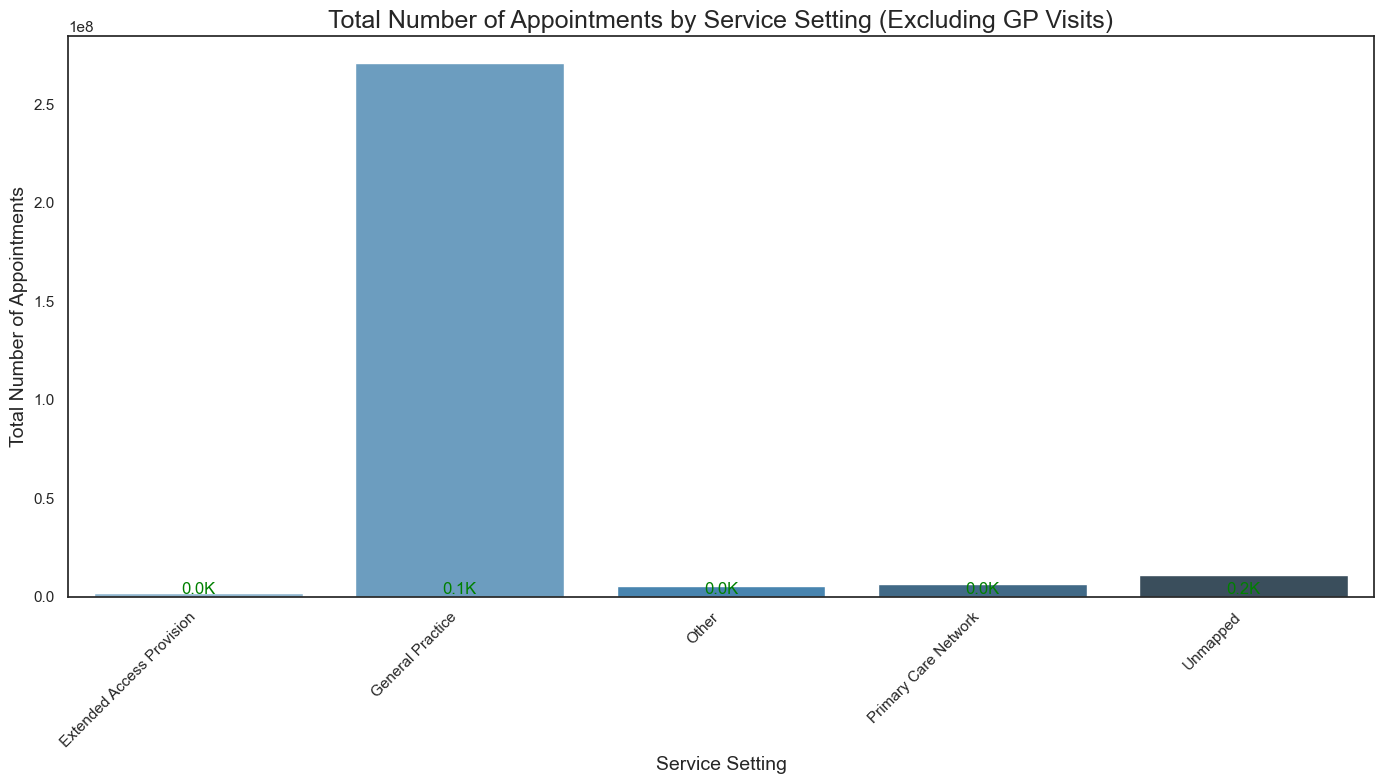

In [638]:
# Group the data by service setting and sum the number of appointments
appointments_by_service = nc_filtered.groupby('service_setting')['count_of_appointments'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot using Seaborn
sns.barplot(data=appointments_by_service, x='service_setting', y='count_of_appointments', palette='Blues_d')

for i, median in enumerate(medians):
    plt.text(i, median, f'{median / 1_000:.1f}K', color='green', ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Service Setting', fontsize=14)
plt.ylabel('Total Number of Appointments', fontsize=14)
plt.title('Total Number of Appointments by Service Setting (Excluding GP Visits)', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.